In [1]:
!pip install pycountry

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.2/6.2 MB 15.1 MB/s eta 0:00:00


In [2]:
!pip install cartopy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 30.9 MB/s eta 0:00:00


In [3]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
import plotly.express as px
from sklearn.linear_model import LinearRegression
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import pycountry
import plotly.graph_objects as go

In [4]:
cov20_21_22 = pd.read_excel("/content/Turkiye_Covid19_verileri_2020_2021_2022.xlsx")

In [5]:
cov20_21_22.head()

,Tarih,Hasta sayısı Yeni,Hasta sayısı Toplam,Hasta sayısı Aktif,Ölüm Yeni,Ölüm Toplam,İyileşen Yeni,İyileşen Toplam,Ağır hastalar Entübe,Ağır hastalar Yoğun bakım,Test sayısı Yeni,Test sayısı Toplam,Sütun1
0,2020-03-11 00:00:00,1,1,0,0,0,0,0,0,0,0,0,NaN
1,2020-03-12 00:00:00,0,1,0,0,0,0,0,0,0,0,0,NaN
2,2020-03-13 00:00:00,4,5,0,0,0,0,0,0,0,0,0,NaN
3,2020-03-14 00:00:00,1,6,0,0,0,0,0,0,0,0,0,NaN
4,2020-03-15 00:00:00,12,18,0,1,1,0,0,0,0,0,0,NaN


In [6]:
cov20_21_22.columns = cov20_21_22.columns.str.replace(" ", "_")

In [7]:
cov20_21_22.columns

Index(['Tarih', 'Hasta_sayısı_Yeni', 'Hasta_sayısı_Toplam',
       'Hasta_sayısı_Aktif', 'Ölüm_Yeni', 'Ölüm_Toplam', 'İyileşen_Yeni',
       'İyileşen_Toplam', 'Ağır_hastalar_Entübe', 'Ağır_hastalar_Yoğun_bakım',
       'Test_sayısı_Yeni', 'Test_sayısı_Toplam', 'Sütun1'],
      dtype='object')

In [8]:
cov20_21_22.drop(['Hasta_sayısı_Aktif','Ölüm_Yeni','İyileşen_Yeni','Test_sayısı_Yeni'], axis=1, inplace=True)

In [9]:
print(cov20_21_22)

                   Tarih  Hasta_sayısı_Yeni  Hasta_sayısı_Toplam  Ölüm_Toplam  \
0    2020-03-11 00:00:00                  1                    1            0   
1    2020-03-12 00:00:00                  0                    1            0   
2    2020-03-13 00:00:00                  4                    5            0   
3    2020-03-14 00:00:00                  1                    6            0   
4    2020-03-15 00:00:00                 12                   18            1   
..                   ...                ...                  ...          ...   
747  2022-03-28 00:00:00                  0             14814542        97850   
748  2022-03-29 00:00:00                  0             14830732        97913   
749  2022-03-30 00:00:00                  0             14845725        97966   
750  2022-03-31 00:00:00                  0             14860061        98022   
751             00:00:00                  0                    0            0   

     İyileşen_Toplam  Ağır_

In [10]:
cov20_21_22.replace([' ', '-'], 0, inplace=True)

In [11]:
cov20_21_22.replace('\.', '', regex=True, inplace=True)

In [12]:
print(cov20_21_22)

                   Tarih  Hasta_sayısı_Yeni  Hasta_sayısı_Toplam  Ölüm_Toplam  \
0    2020-03-11 00:00:00                  1                    1            0   
1    2020-03-12 00:00:00                  0                    1            0   
2    2020-03-13 00:00:00                  4                    5            0   
3    2020-03-14 00:00:00                  1                    6            0   
4    2020-03-15 00:00:00                 12                   18            1   
..                   ...                ...                  ...          ...   
747  2022-03-28 00:00:00                  0             14814542        97850   
748  2022-03-29 00:00:00                  0             14830732        97913   
749  2022-03-30 00:00:00                  0             14845725        97966   
750  2022-03-31 00:00:00                  0             14860061        98022   
751             00:00:00                  0                    0            0   

     İyileşen_Toplam  Ağır_

In [13]:
cov20_21_22.Ölüm_Toplam

0          0
1          0
2          0
3          0
4          1
       ...  
747    97850
748    97913
749    97966
750    98022
751        0
Name: Ölüm_Toplam, Length: 752, dtype: int64

In [14]:
cov20_21_22.Ölüm_Toplam.dtype

dtype('int64')

In [15]:
cov20_21_22['Ölüm_Toplam'] = cov20_21_22['Ölüm_Toplam'].replace('\.', '', regex=True)

In [16]:
cov20_21_22.Ölüm_Toplam

0          0
1          0
2          0
3          0
4          1
       ...  
747    97850
748    97913
749    97966
750    98022
751        0
Name: Ölüm_Toplam, Length: 752, dtype: int64

In [17]:
cov20_21_22['Ölüm_Toplam'] = pd.to_numeric(cov20_21_22['Ölüm_Toplam'], errors='coerce')

In [18]:
cov20_21_22.Ölüm_Toplam

0          0
1          0
2          0
3          0
4          1
       ...  
747    97850
748    97913
749    97966
750    98022
751        0
Name: Ölüm_Toplam, Length: 752, dtype: int64

In [19]:
cov20_21_22.Tarih

0      2020-03-11 00:00:00
1      2020-03-12 00:00:00
2      2020-03-13 00:00:00
3      2020-03-14 00:00:00
4      2020-03-15 00:00:00
              ...         
747    2022-03-28 00:00:00
748    2022-03-29 00:00:00
749    2022-03-30 00:00:00
750    2022-03-31 00:00:00
751               00:00:00
Name: Tarih, Length: 752, dtype: object

<Axes: >

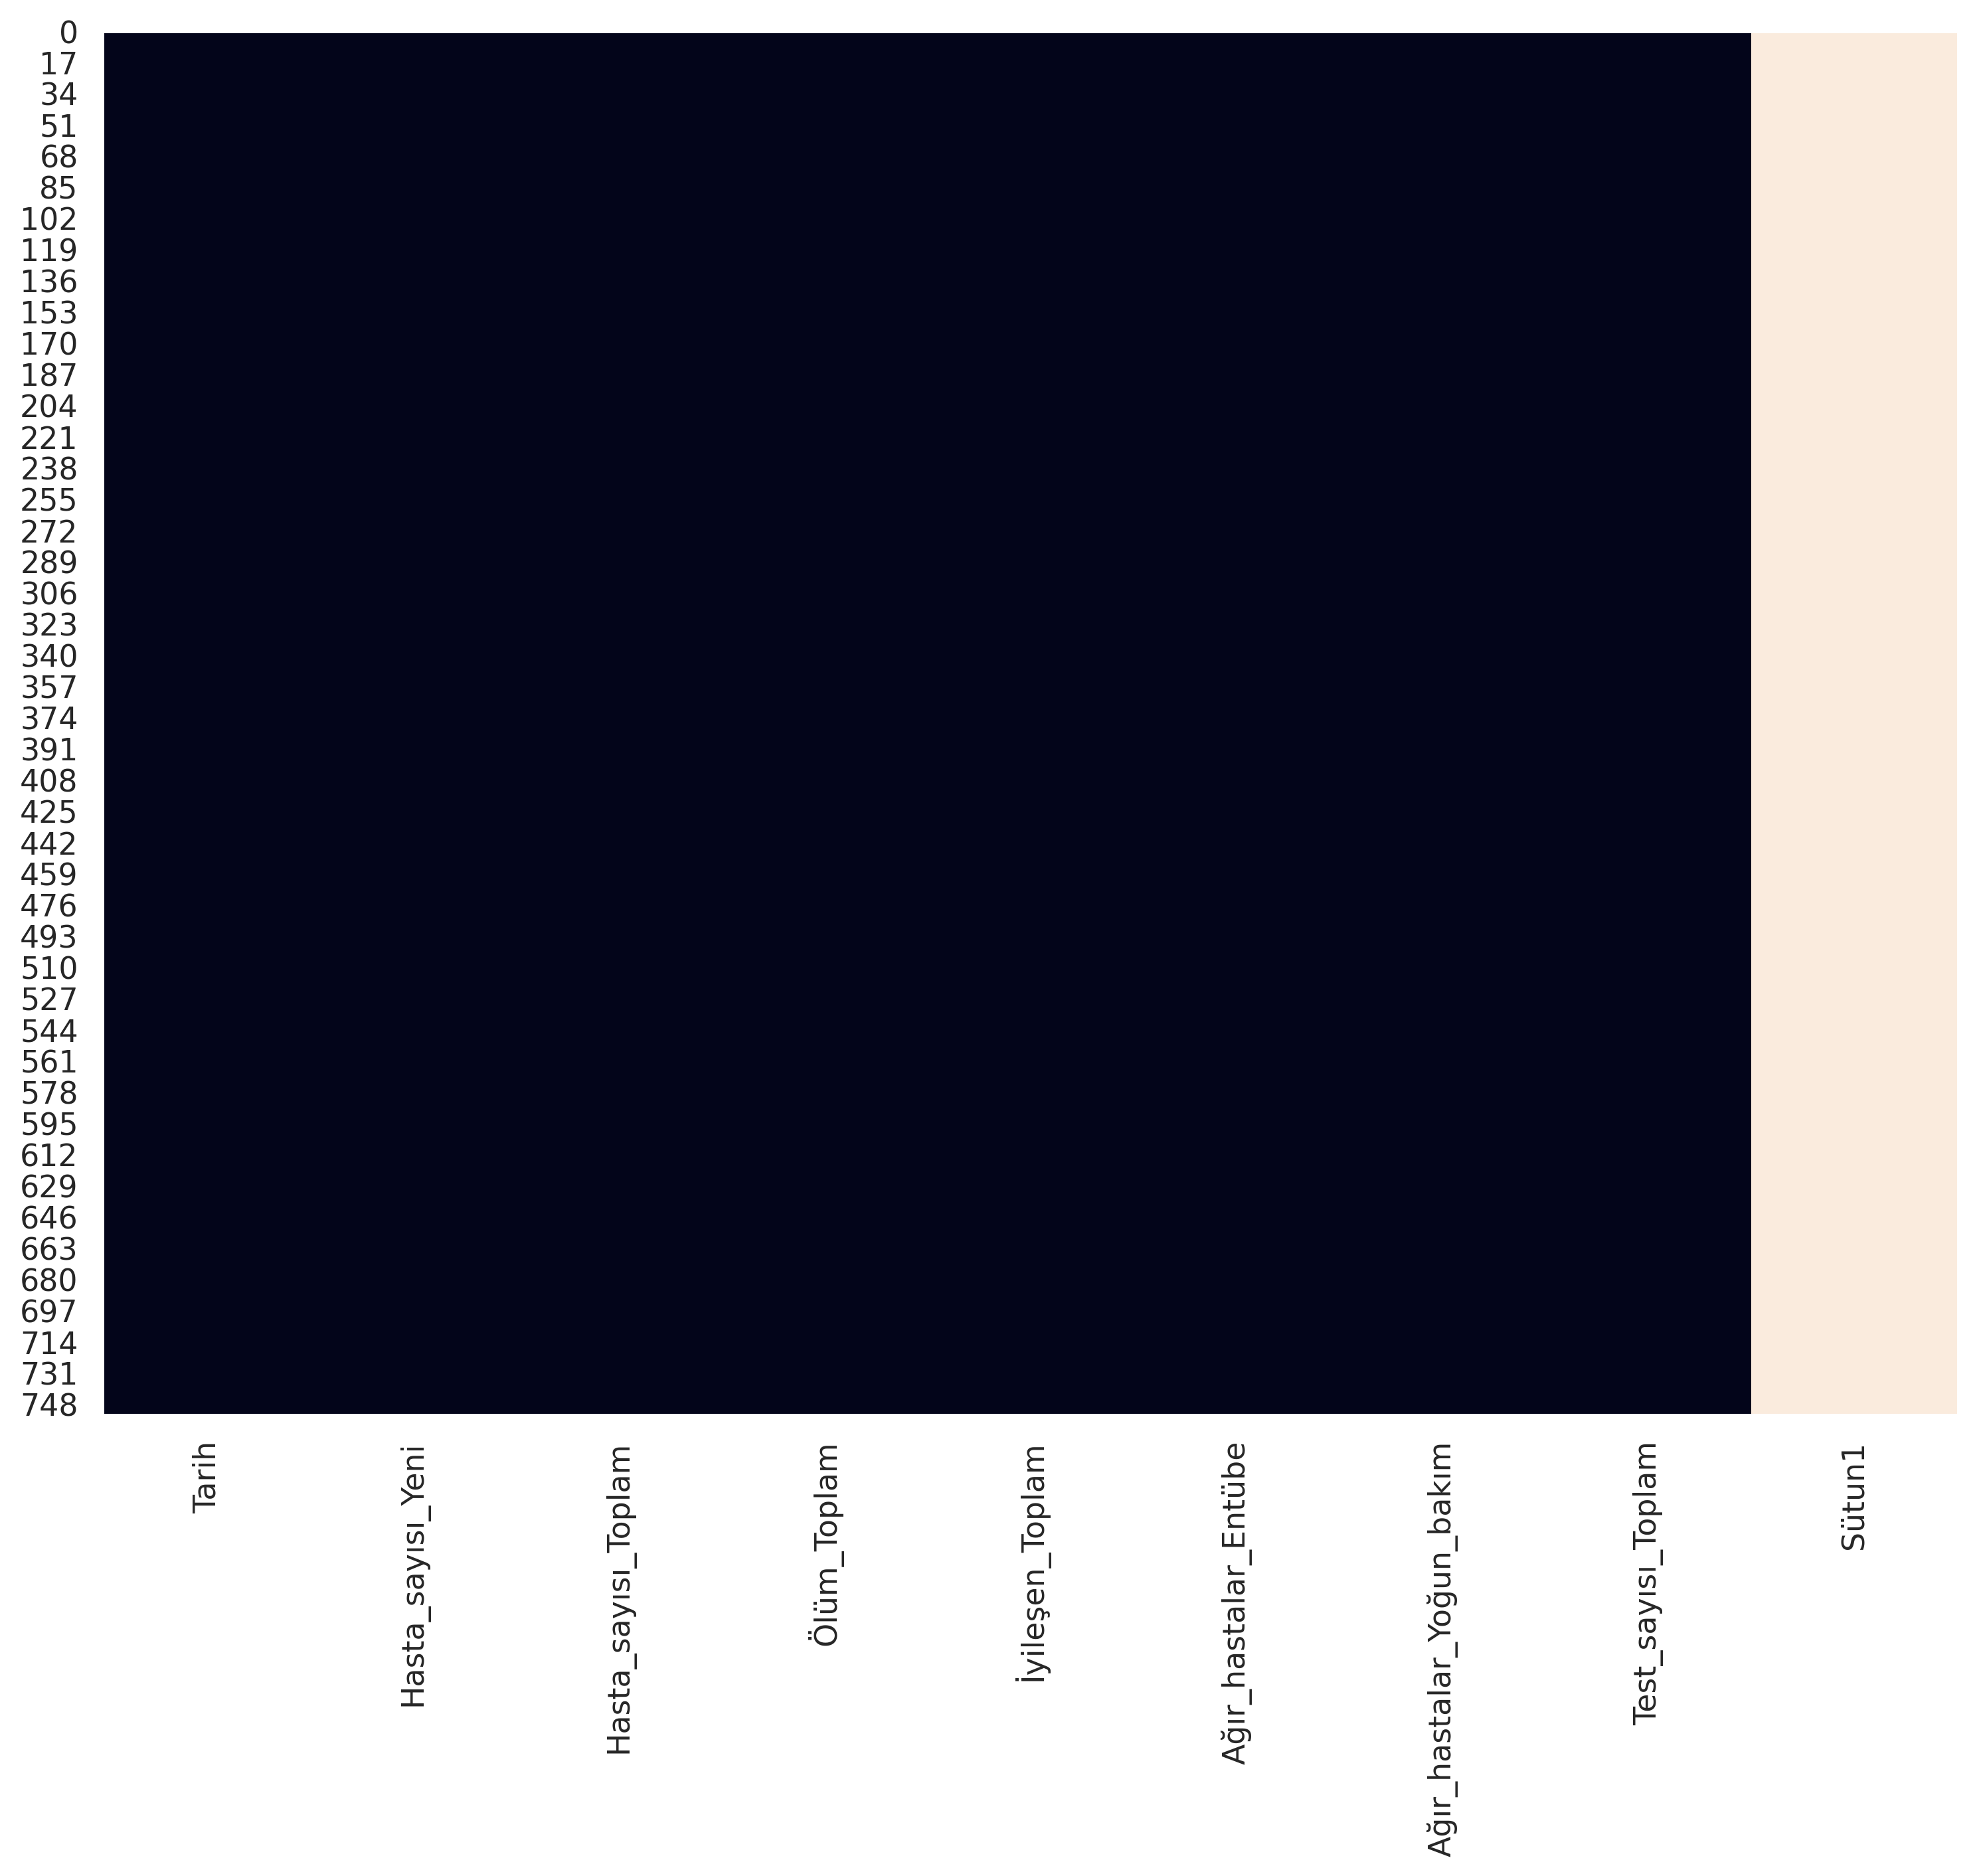

In [20]:
sns.set_theme()
sns.set(rc={"figure.dpi": 300, "figure.figsize": (12, 9)})
sns.heatmap(cov20_21_22.isnull(), cbar=False)

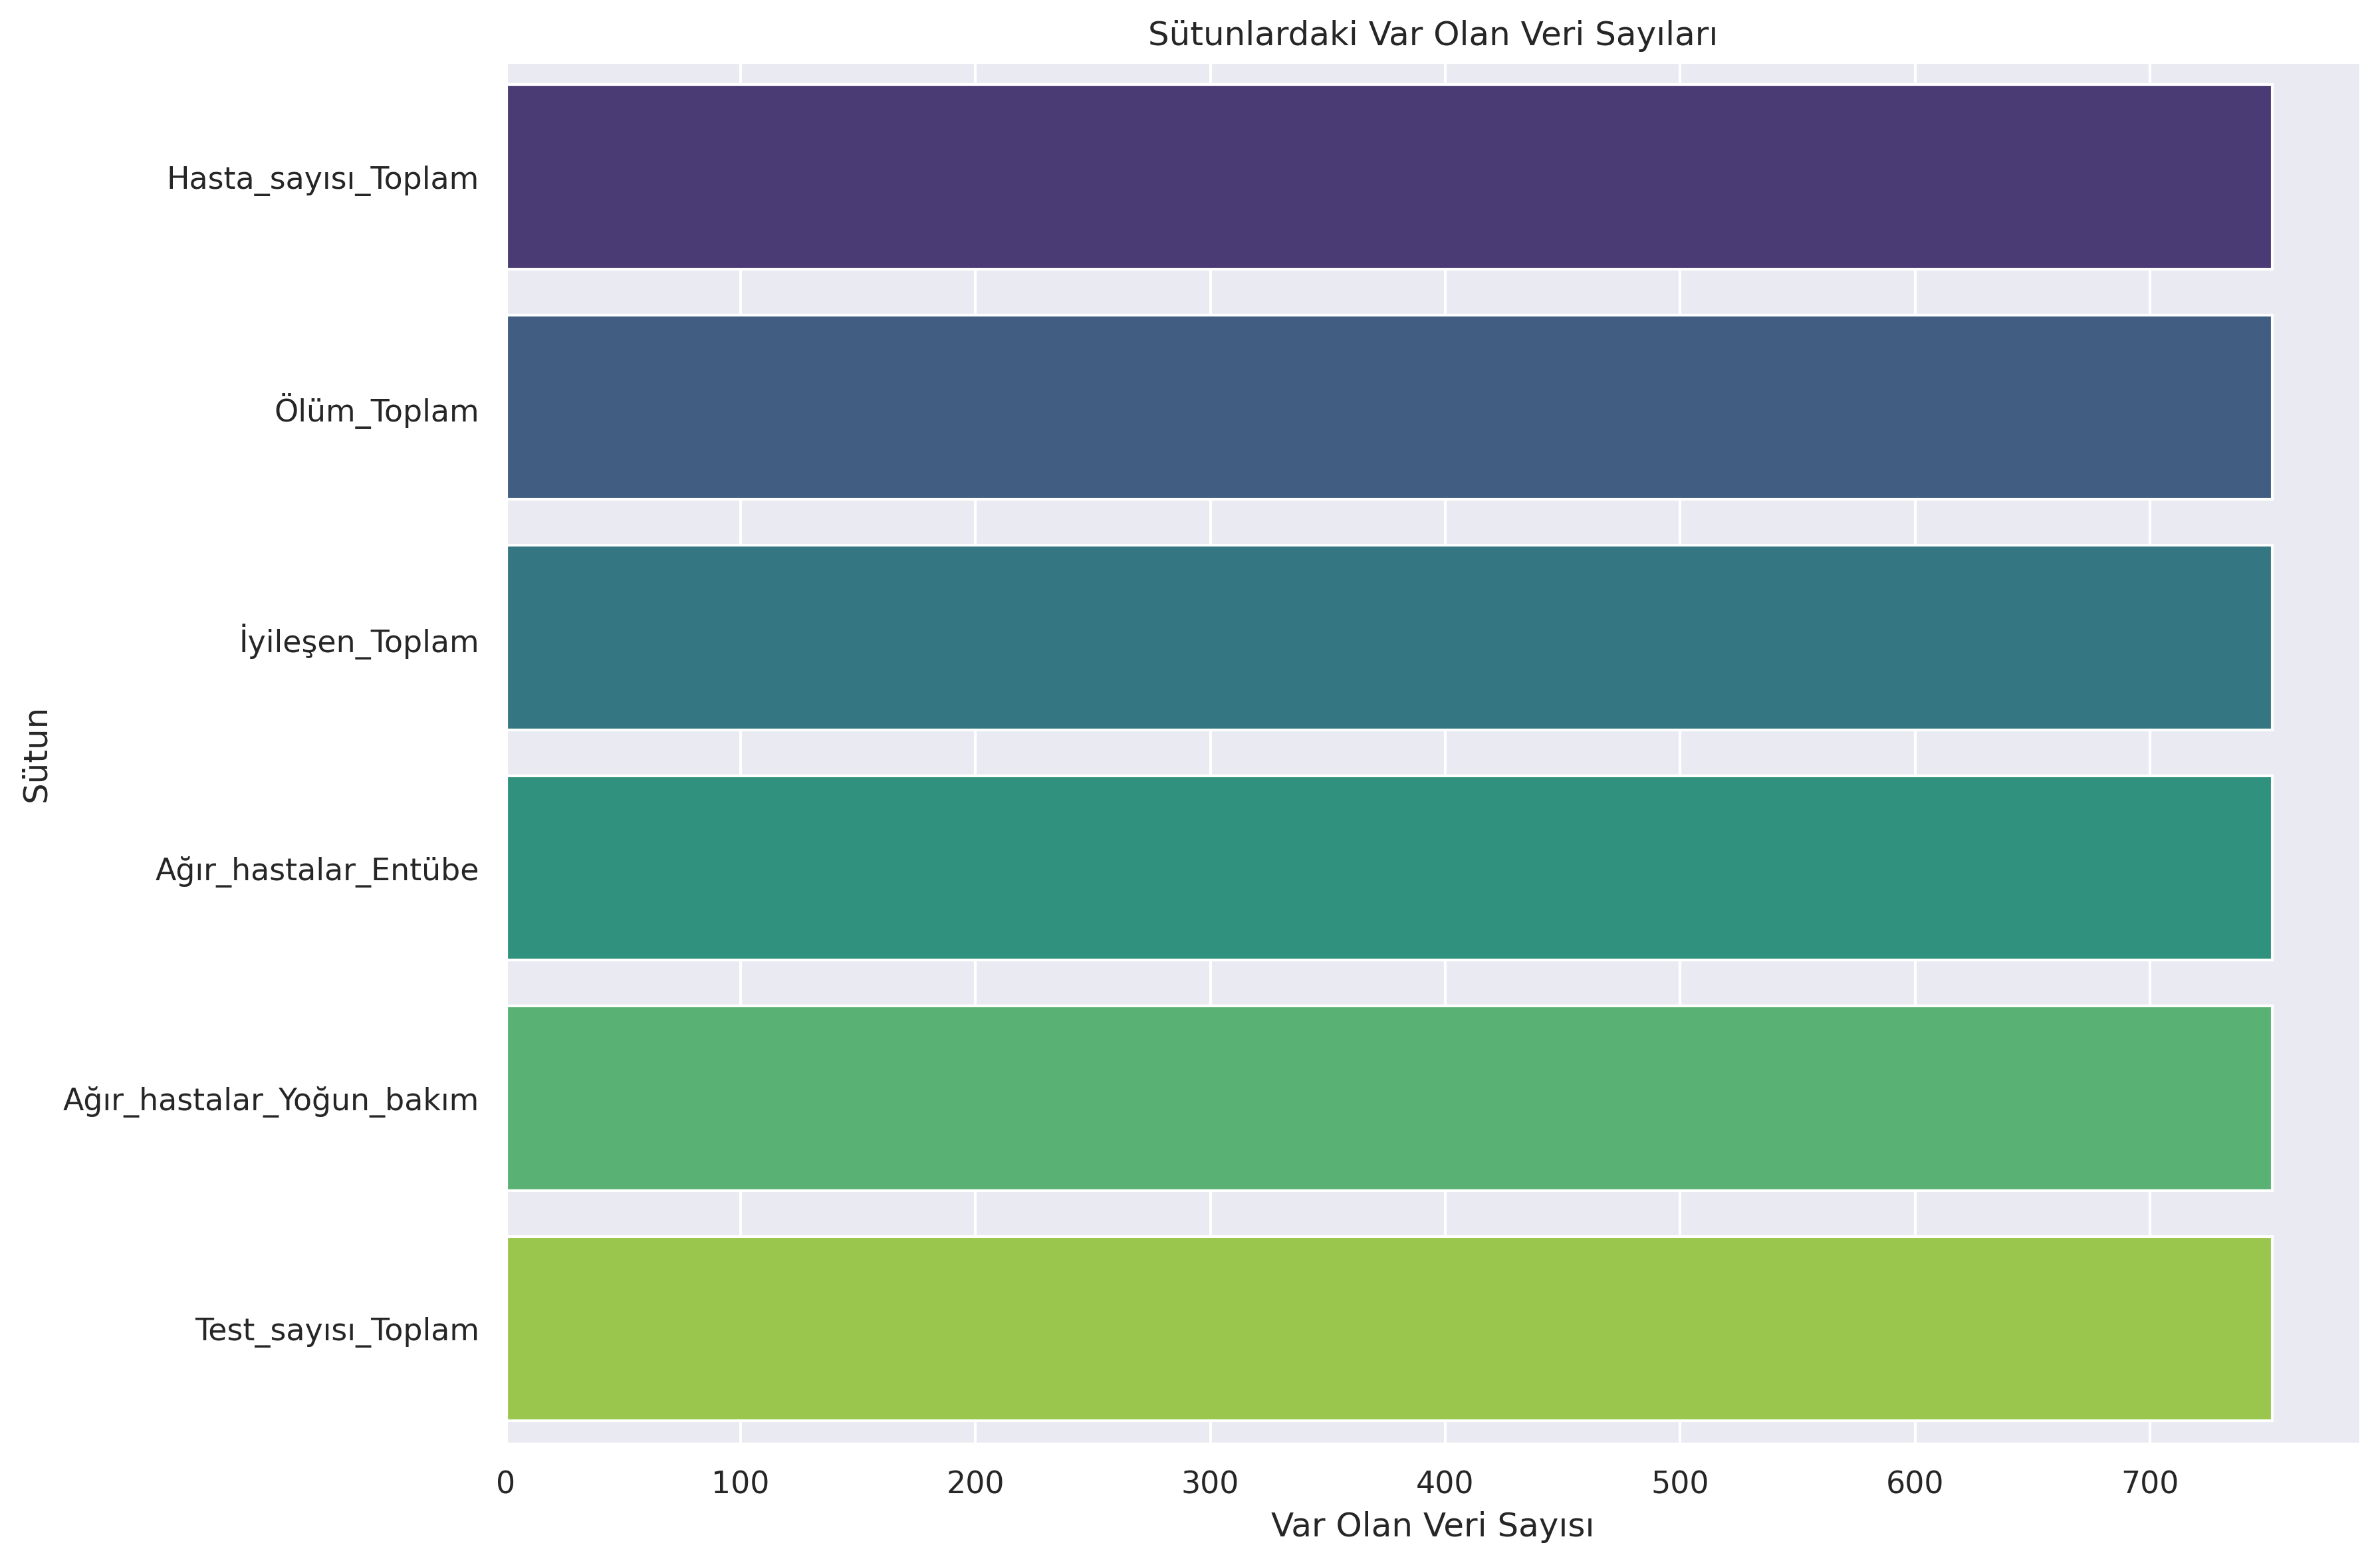

In [22]:
Stopveri = cov20_21_22[['Hasta_sayısı_Toplam', 'Ölüm_Toplam', 'İyileşen_Toplam',
       'Ağır_hastalar_Entübe', 'Ağır_hastalar_Yoğun_bakım',
       'Test_sayısı_Toplam']].count()

veriSay = pd.DataFrame({"Sütun": Stopveri.index, "Var Olan Veri Sayısı": Stopveri.values})

veriSay = veriSay.sort_values(by="Var Olan Veri Sayısı", ascending=False)

sns.set_theme()
sns.set(rc={"figure.dpi": 300, "figure.figsize": (12, 9)})
sns.barplot(x="Var Olan Veri Sayısı", y="Sütun", data=veriSay, palette="viridis", hue="Sütun", legend=False)

plt.title("Sütunlardaki Var Olan Veri Sayıları")
plt.xlabel("Var Olan Veri Sayısı")
plt.ylabel("Sütun")
plt.show()

In [23]:
cov20_21_22.Test_sayısı_Toplam.dtype

dtype('int64')

In [24]:
maxVAKA_row = cov20_21_22.sort_values(by="Hasta_sayısı_Yeni", ascending=False).iloc[0]
maxVAKA = maxVAKA_row["Tarih"]
print("En fazla hasta sayısı yeni kaydı olan tarih:", maxVAKA)

En fazla hasta sayısı yeni kaydı olan tarih: 2020-11-24 00:00:00


Toplam yeni vaka sayısını düzelttim sadece  by= yerine Hasta_sayısı_Yeni yazmam gerekiyormuş

In [26]:
topTestİyileşen=pd.read_excel("/content/toptestİyi20_21_22.xlsx")

In [27]:
topTestİyileşen.head()

,YIL,Test_sayısı_Toplam,İyileşen_Toplam
0,2020,2257348943,91098264
1,2021,23558233106,1894714534
2,2022,12394545939,1082956610


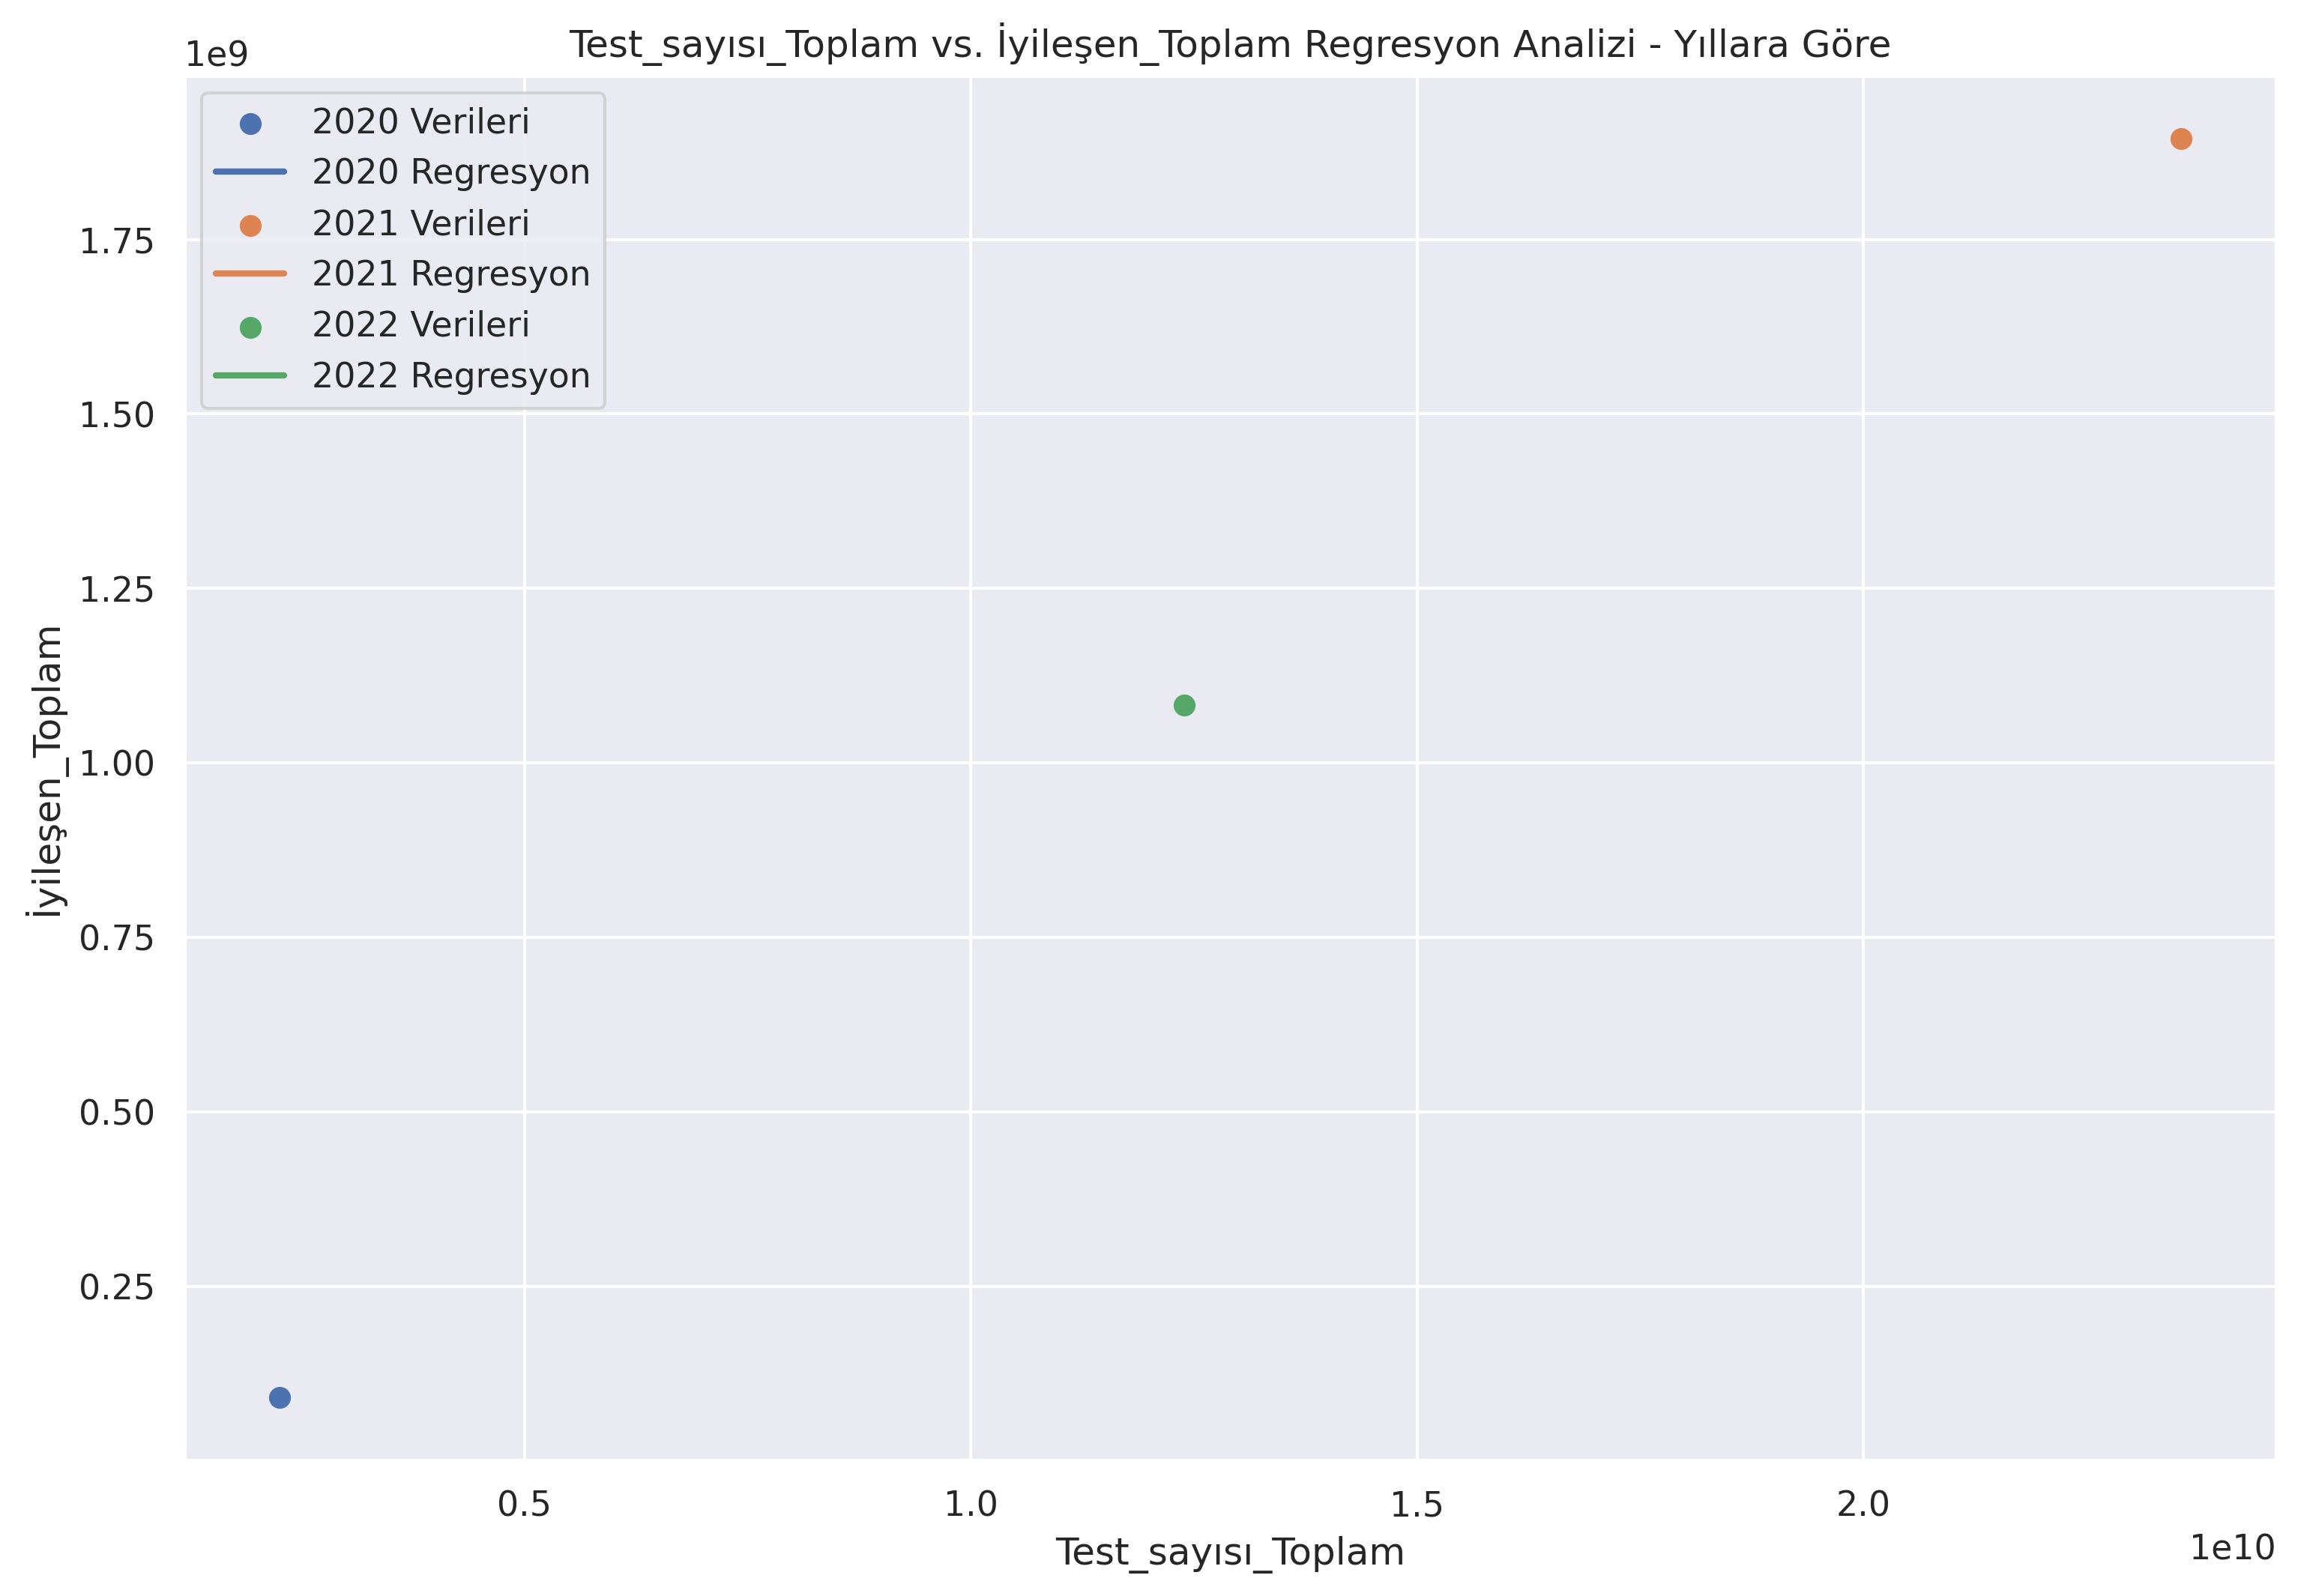

In [28]:
cizim = topTestİyileşen[["YIL", "Test_sayısı_Toplam", "İyileşen_Toplam"]]

plt.figure(figsize=(12, 8))

for year in cizim["YIL"].unique():
    yılBilg = cizim[cizim["YIL"] == year]
    X = yılBilg["Test_sayısı_Toplam"].values.reshape(-1, 1)
    y = yılBilg["İyileşen_Toplam"].values.reshape(-1, 1)

    regression_model = LinearRegression()
    regression_model.fit(X, y)
    regression_line = regression_model.predict(X)

    plt.scatter(X, y, label=f"{year} Verileri")
    plt.plot(X, regression_line, label=f"{year} Regresyon", linewidth=2)

plt.title("Test_sayısı_Toplam vs. İyileşen_Toplam Regresyon Analizi - Yıllara Göre")
plt.xlabel("Test_sayısı_Toplam")
plt.ylabel("İyileşen_Toplam")
plt.legend()
plt.show()

In [29]:
cov20_21_22.Test_sayısı_Toplam.sum()

38210127988

In [30]:
cov20_21_22.İyileşen_Toplam.sum()

3068772074

In [31]:
ilGöc20=pd.read_excel("/content/2020 il il iç göç.xlsx")

In [32]:
ilGöc20.head()

,İL,GÖÇ,TOPLAMVAKASAYISI,BÖLGE
0,Adana,4490,7012,Akdeniz
1,Adıyaman,668,370,Güneydoğu Anadolu
2,Afyonkarahisar,5009,2681,Ege
3,Ağrı,313,1196,Doğu Anadolu
4,Amasya,686,701,Karadeniz


In [33]:
maxgöc_satır=ilGöc20.sort_values(by="GÖÇ",ascending=False).iloc[0]
maxgöc=maxgöc_satır["İL"]
print("En fazla göç alan il : ",maxgöc)

En fazla göç alan il :  İstanbul


In [34]:
minGöç_satır = ilGöc20.sort_values(by="GÖÇ").iloc[0]
minGöç_il = minGöç_satır["İL"]
print("En az göç alan il: ", minGöç_il)

En az göç alan il:  Ardahan


In [35]:
ilGöc20.dtypes

İL                  object
GÖÇ                  int64
TOPLAMVAKASAYISI     int64
BÖLGE               object
dtype: object

In [36]:
ilgöcizim = ilGöc20[["İL", "GÖÇ"]]

<ipython-input-37-62499cb95fb7>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="İL", y="GÖÇ", data=ilgöcizim, palette="viridis")


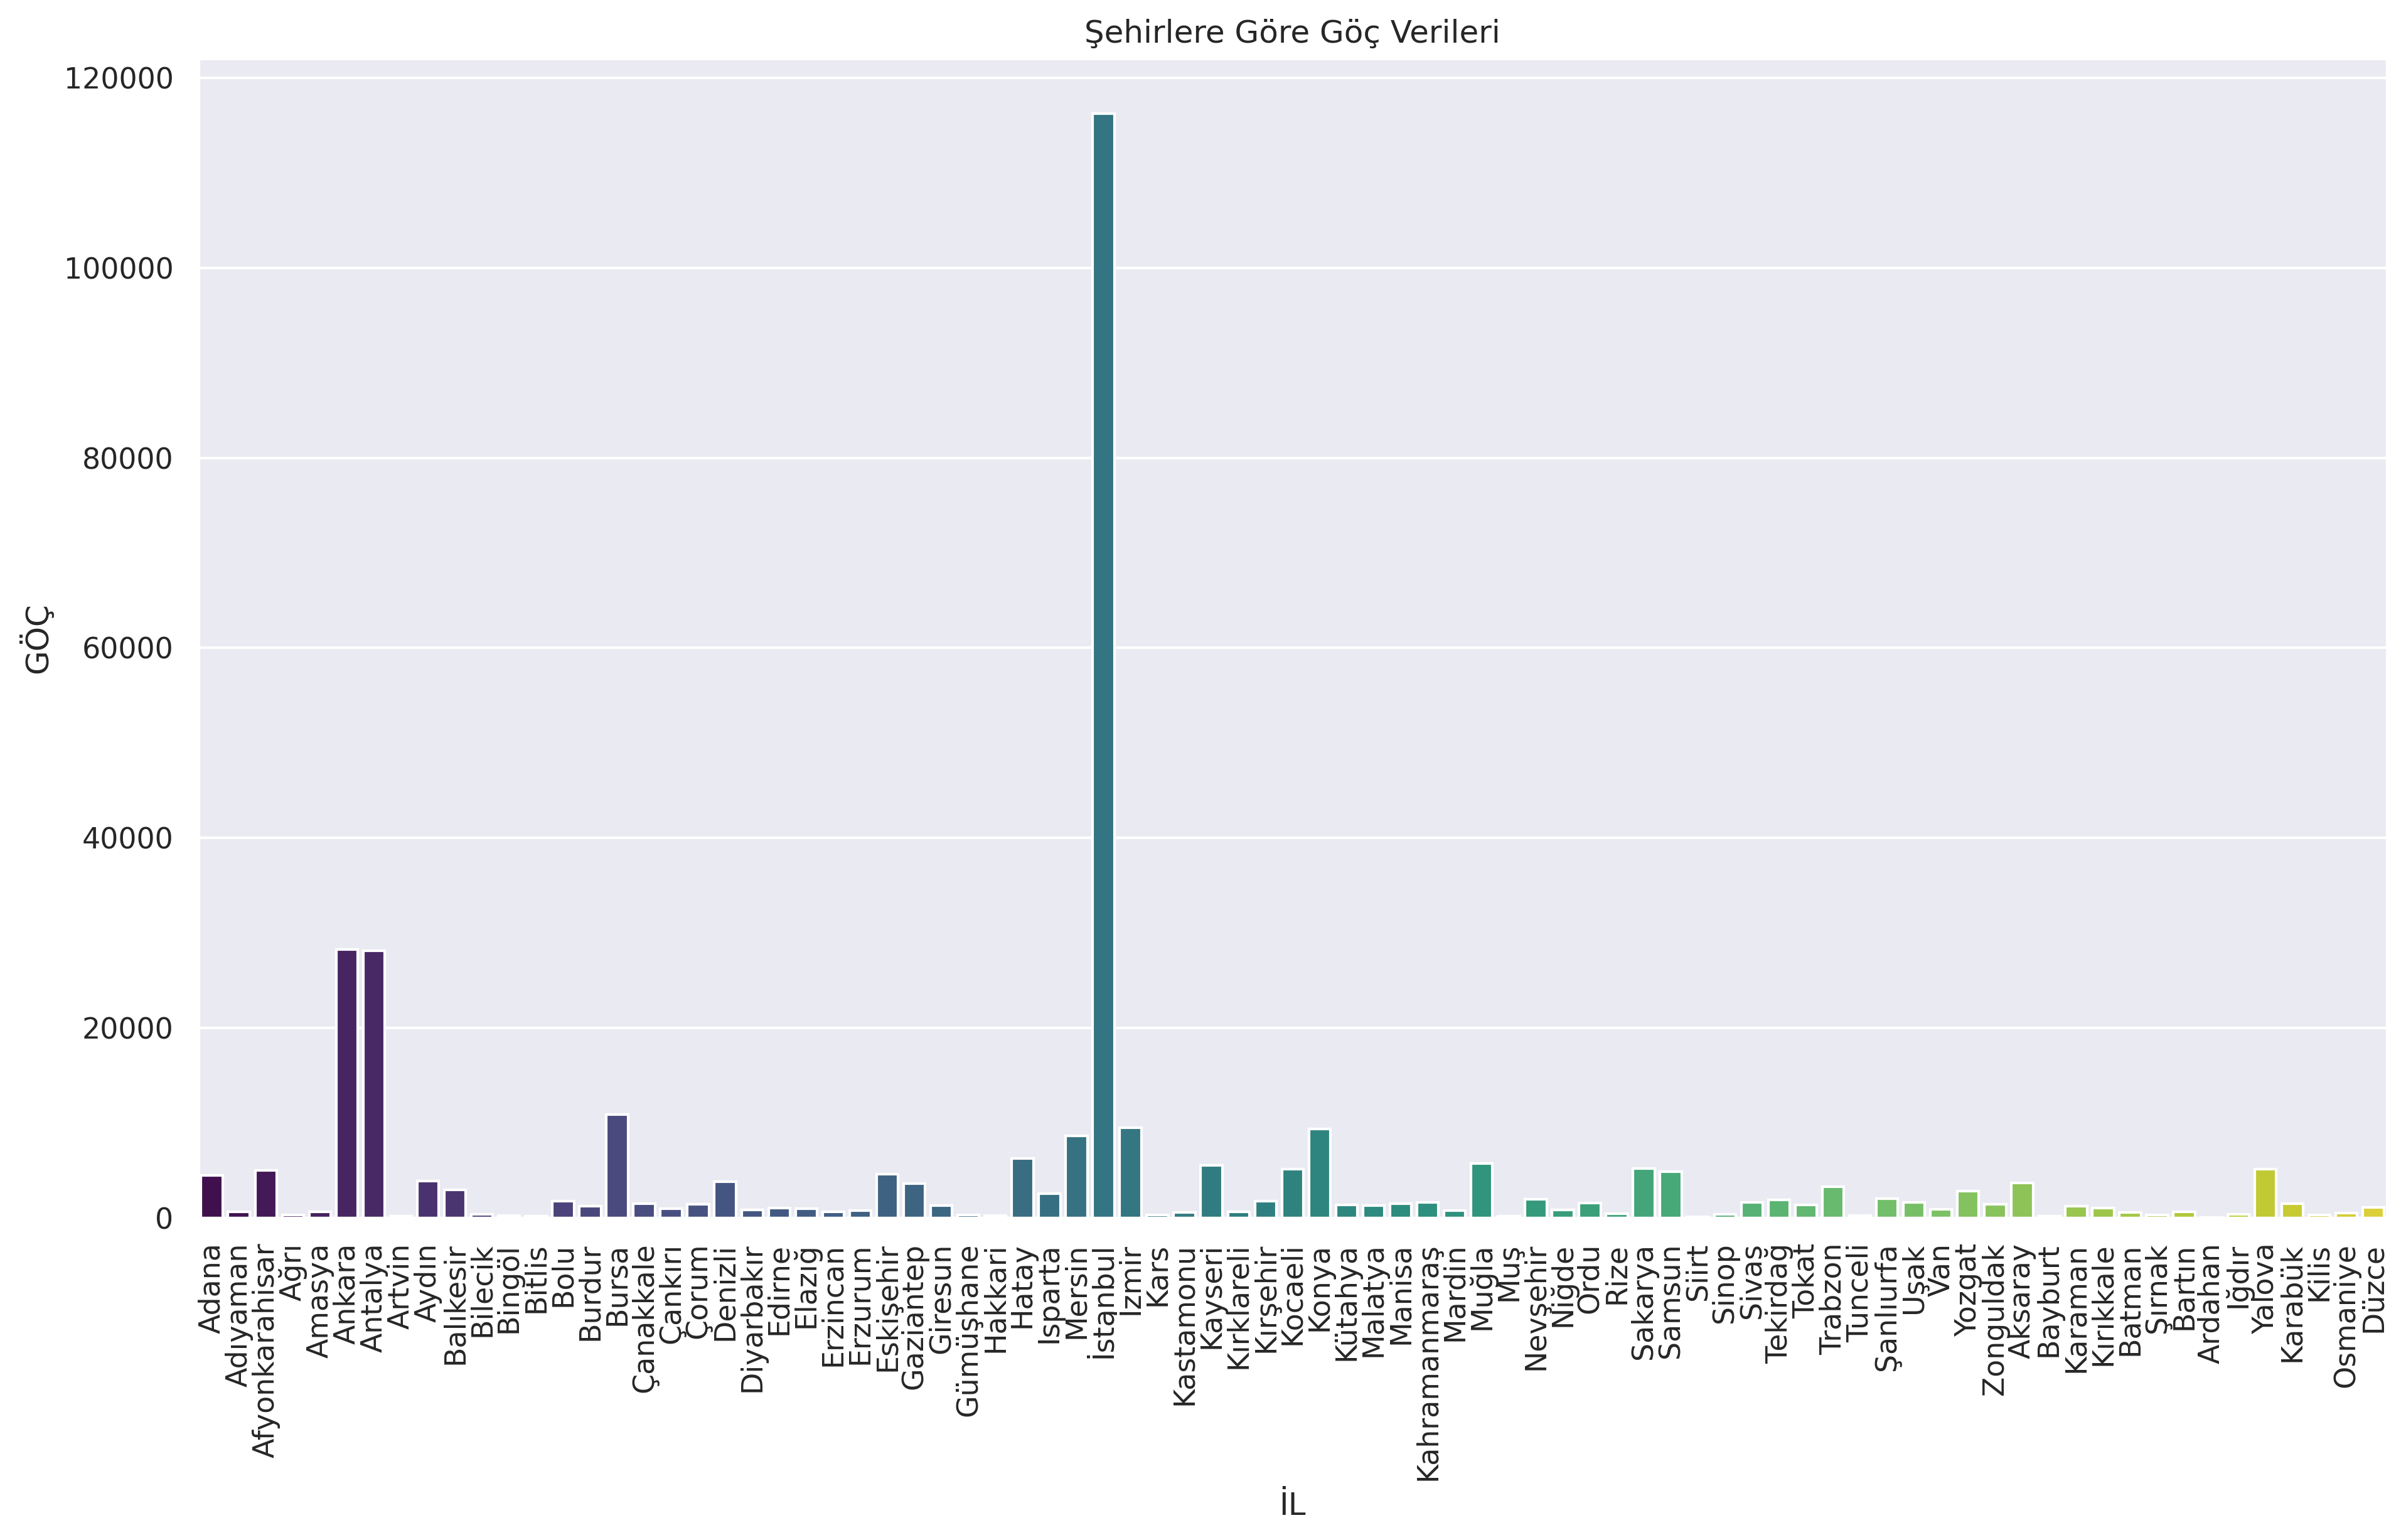

In [37]:
plt.figure(figsize=(15, 8))
sns.barplot(x="İL", y="GÖÇ", data=ilgöcizim, palette="viridis")
plt.xticks(rotation=90)
plt.title("Şehirlere Göre Göç Verileri")
plt.xlabel("İL")
plt.ylabel("GÖÇ")
plt.show()

In [38]:
vakagöcizim=ilGöc20[["GÖÇ","TOPLAMVAKASAYISI"]]

<ipython-input-39-b6bccc3680c2>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="TOPLAMVAKASAYISI",y="GÖÇ",data=vakagöcizim, palette="viridis")


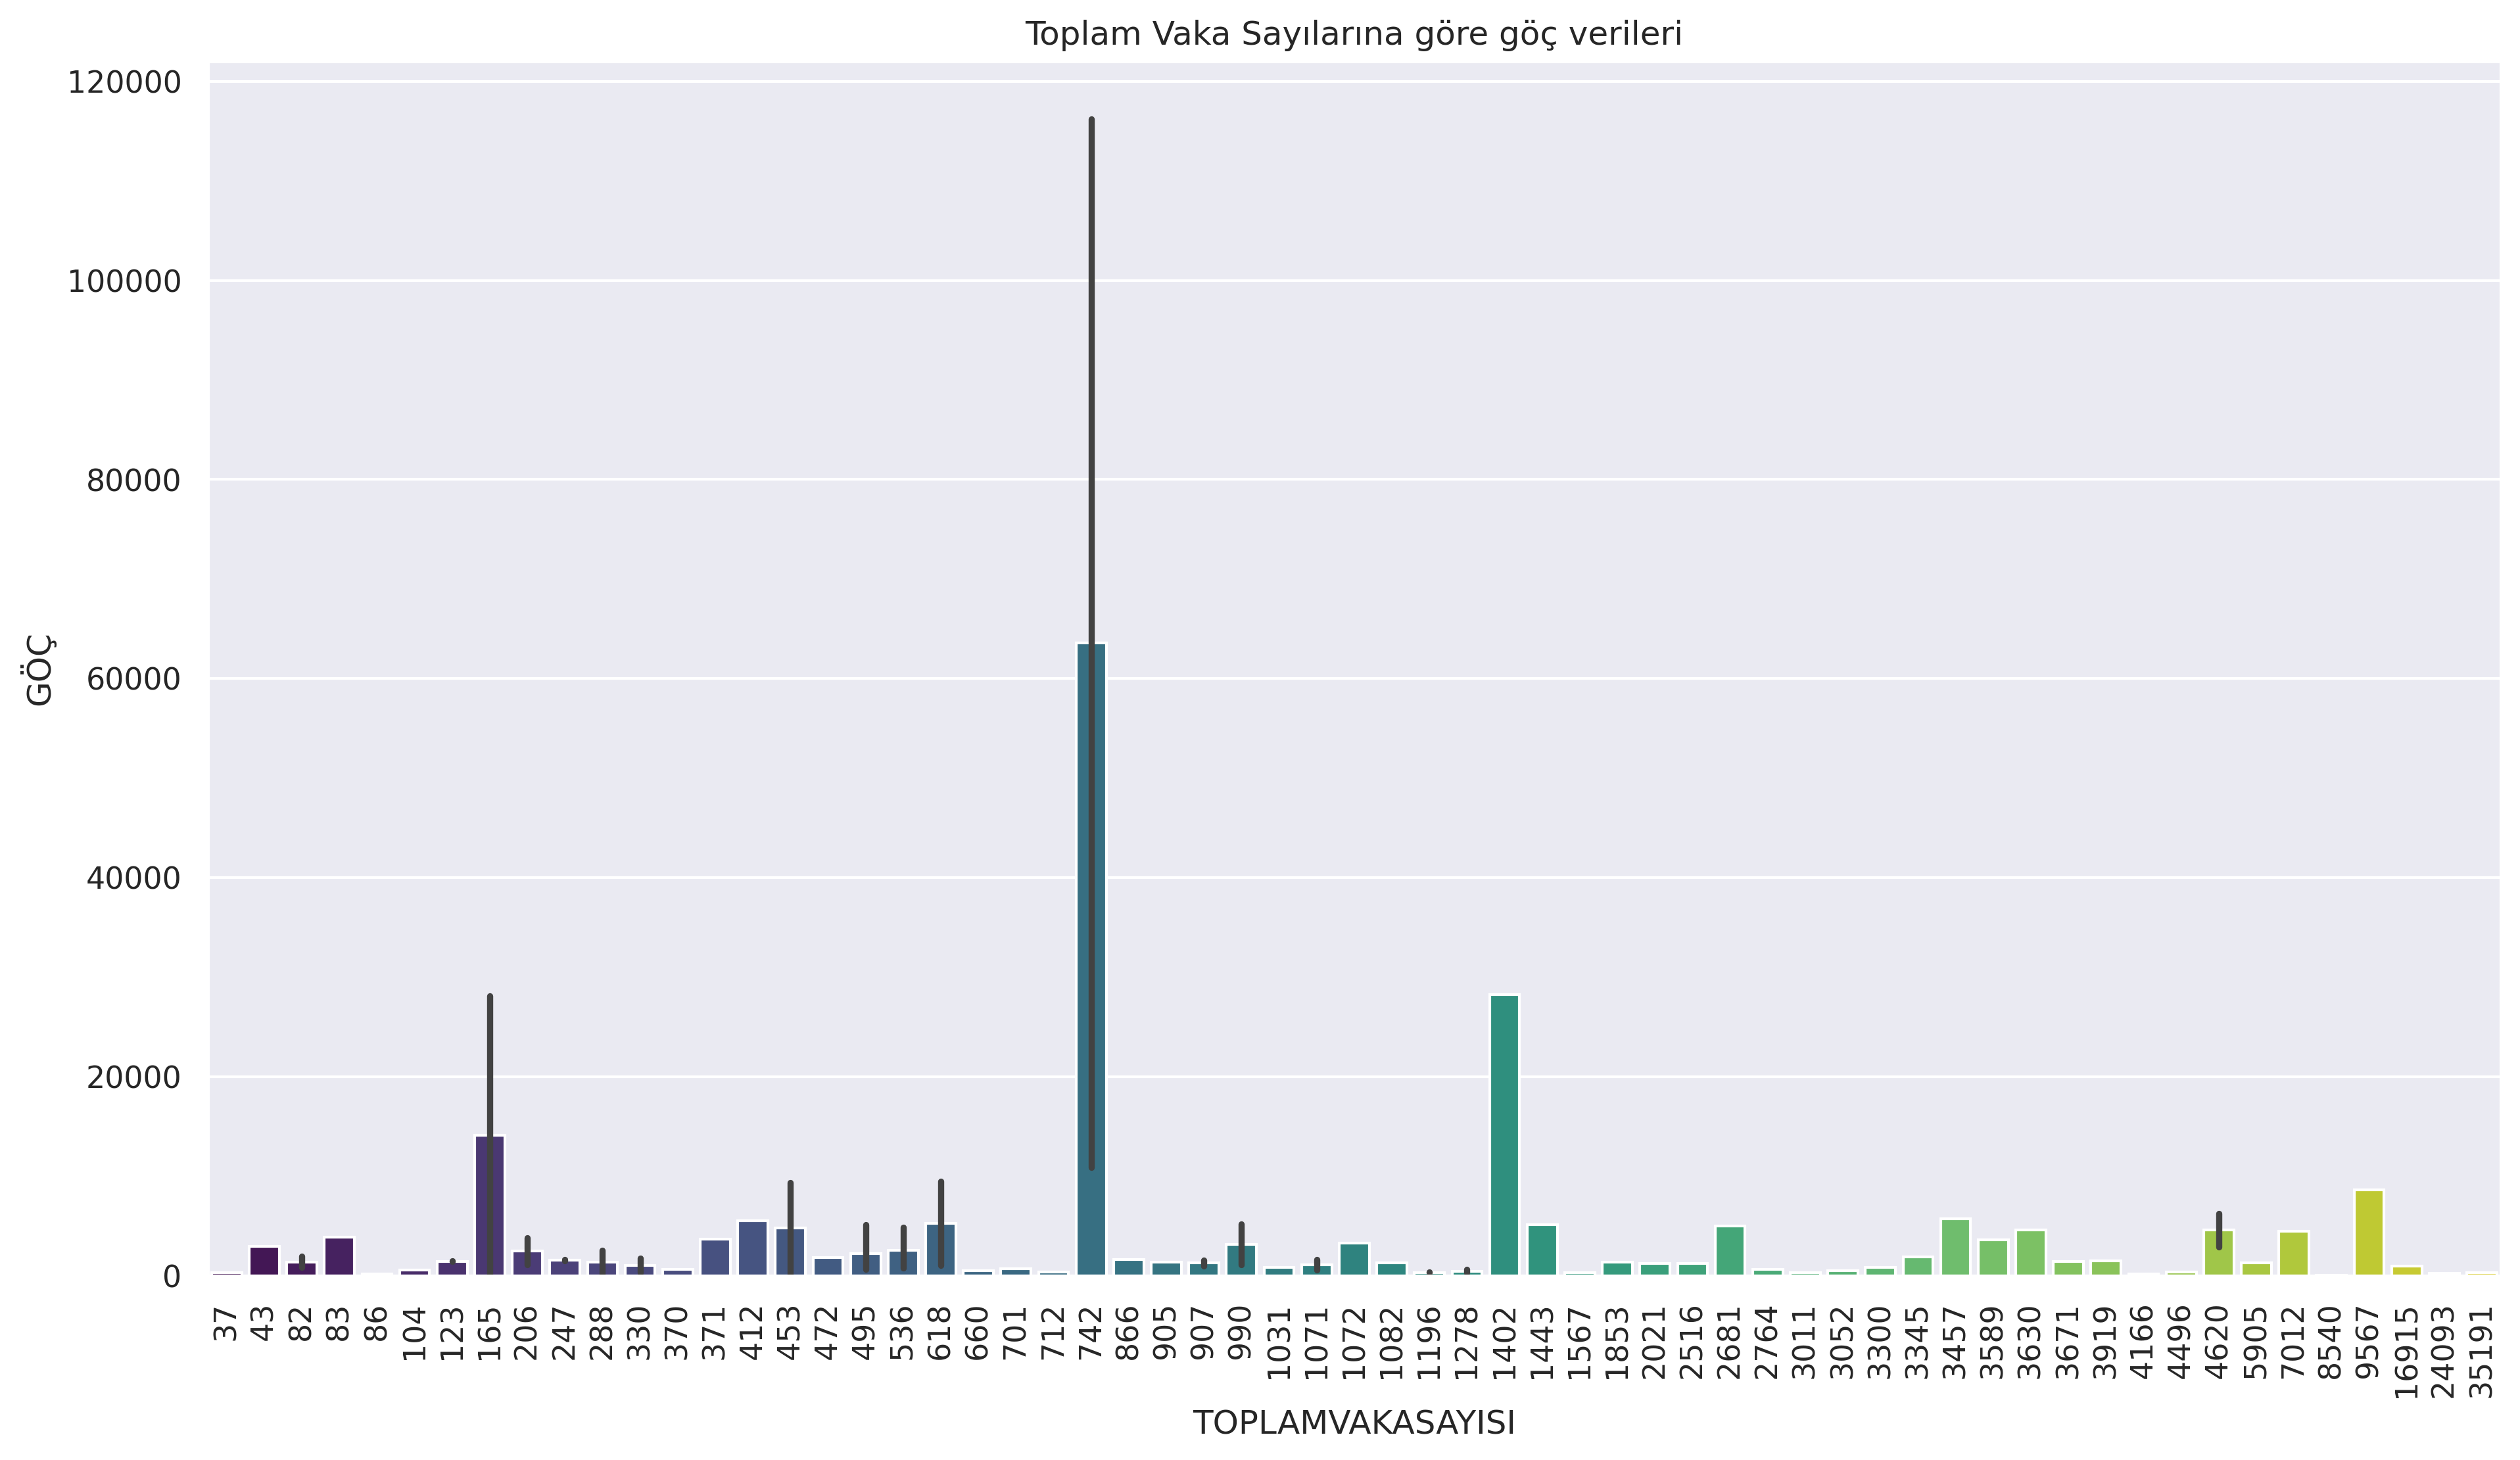

In [39]:
plt.figure(figsize=(15,8))
sns.barplot(x="TOPLAMVAKASAYISI",y="GÖÇ",data=vakagöcizim, palette="viridis")
plt.xticks(rotation=90)
plt.title("Toplam Vaka Sayılarına göre göç verileri")
plt.xlabel("TOPLAMVAKASAYISI")
plt.ylabel("GÖÇ")
plt.show()

In [40]:
maxvaka_satır=ilGöc20.sort_values(by="TOPLAMVAKASAYISI",ascending=False).iloc[0]
maxvaka=maxvaka_satır["İL"]
print("En fazla vakaya sahip il : ",maxvaka)

En fazla vakaya sahip il :  Hakkari


In [41]:
minvaka_satır = ilGöc20.sort_values(by="TOPLAMVAKASAYISI").iloc[0]
minvaka_il = minGöç_satır["İL"]
print("En az vakaya sahip il: ", minvaka_il)

En az vakaya sahip il:  Ardahan


In [42]:
ilk_20_göc = ilGöc20.sort_values(by="GÖÇ", ascending=False).head(20)

for index, row in ilk_20_göc.iterrows():
    print(f"Il: {row['İL']}, Göç: {row['GÖÇ']}")

Il: İstanbul, Göç: 116229
Il: Ankara, Göç: 28278
Il: Antalya, Göç: 28152
Il: Bursa, Göç: 10910
Il: İzmir, Göç: 9485
Il: Konya, Göç: 9381
Il: Mersin, Göç: 8675
Il: Hatay, Göç: 6297
Il: Muğla, Göç: 5727
Il: Kayseri, Göç: 5571
Il: Sakarya, Göç: 5230
Il: Kocaeli, Göç: 5148
Il: Yalova, Göç: 5132
Il: Afyonkarahisar, Göç: 5009
Il: Samsun, Göç: 4890
Il: Eskişehir, Göç: 4628
Il: Adana, Göç: 4490
Il: Aydın, Göç: 3864
Il: Denizli, Göç: 3827
Il: Aksaray, Göç: 3722


In [43]:
ilk_20_vaka = ilGöc20.sort_values(by="TOPLAMVAKASAYISI", ascending=False).head(20)

for index, row in ilk_20_vaka.iterrows():
    print(f"Il: {row['İL']}, Toplam Vaka Sayısı: {row['TOPLAMVAKASAYISI']}")


Il: Hakkari, Toplam Vaka Sayısı: 35191
Il: Tunceli, Toplam Vaka Sayısı: 24093
Il: Van, Toplam Vaka Sayısı: 16915
Il: Mersin, Toplam Vaka Sayısı: 9567
Il: Ardahan, Toplam Vaka Sayısı: 8540
Il: Adana, Toplam Vaka Sayısı: 7012
Il: Giresun, Toplam Vaka Sayısı: 5905
Il: Hatay, Toplam Vaka Sayısı: 4620
Il: Yozgat, Toplam Vaka Sayısı: 4620
Il: Iğdır, Toplam Vaka Sayısı: 4496
Il: Muş, Toplam Vaka Sayısı: 4166
Il: Çanakkale, Toplam Vaka Sayısı: 3919
Il: Zonguldak, Toplam Vaka Sayısı: 3671
Il: Eskişehir, Toplam Vaka Sayısı: 3630
Il: Gaziantep, Toplam Vaka Sayısı: 3589
Il: Muğla, Toplam Vaka Sayısı: 3457
Il: Tekirdağ, Toplam Vaka Sayısı: 3345
Il: Niğde, Toplam Vaka Sayısı: 3300
Il: Rize, Toplam Vaka Sayısı: 3052
Il: Şırnak, Toplam Vaka Sayısı: 3011


In [44]:
ilGöc20.head()

,İL,GÖÇ,TOPLAMVAKASAYISI,BÖLGE
0,Adana,4490,7012,Akdeniz
1,Adıyaman,668,370,Güneydoğu Anadolu
2,Afyonkarahisar,5009,2681,Ege
3,Ağrı,313,1196,Doğu Anadolu
4,Amasya,686,701,Karadeniz


In [45]:
güneyDoguVaka = ilGöc20.loc[ilGöc20["BÖLGE"] == "Güneydoğu Anadolu", ["İL", "TOPLAMVAKASAYISI", "BÖLGE"]]

In [46]:
güneyDoguİl = ilGöc20.loc[ilGöc20["BÖLGE"] == "Güneydoğu Anadolu", ["İL", "GÖÇ", "BÖLGE"]]

In [47]:
doguAnadoluİl = ilGöc20.loc[ilGöc20["BÖLGE"] == "Doğu Anadolu", ["İL", "GÖÇ", "BÖLGE"]]

In [48]:
akdenizİl = ilGöc20.loc[ilGöc20["BÖLGE"] == "Akdeniz", ["İL", "GÖÇ", "BÖLGE"]]

In [49]:
içAnadoluİl = ilGöc20.loc[ilGöc20["BÖLGE"] == "İç Anadolu", ["İL", "GÖÇ", "BÖLGE"]]

In [50]:
karadenizİl = ilGöc20.loc[ilGöc20["BÖLGE"] == "Karadeniz", ["İL", "GÖÇ", "BÖLGE"]]

In [51]:
egeİl = ilGöc20.loc[ilGöc20["BÖLGE"] == "Ege", ["İL", "GÖÇ", "BÖLGE"]]

In [52]:
marmaraİl = ilGöc20.loc[ilGöc20["BÖLGE"] == "Marmara", ["İL", "GÖÇ", "BÖLGE"]]

In [53]:
print(güneyDoguİl)

            İL   GÖÇ              BÖLGE
1     Adıyaman   668  Güneydoğu Anadolu
20  Diyarbakır   837  Güneydoğu Anadolu
26   Gaziantep  3631  Güneydoğu Anadolu
29     Hakkari   291  Güneydoğu Anadolu
30       Hatay  6297  Güneydoğu Anadolu
46      Mardin   764  Güneydoğu Anadolu
55       Siirt   141  Güneydoğu Anadolu
62   Şanlıurfa  2052  Güneydoğu Anadolu
71      Batman   607  Güneydoğu Anadolu
72      Şırnak   343  Güneydoğu Anadolu
78       Kilis   306  Güneydoğu Anadolu


In [54]:
içAnadoluİl.GÖÇ.sum()

63964

In [55]:
karadenizİl.GÖÇ.sum()

23260

In [56]:
güneyDoguİl.GÖÇ.sum()

15937

In [57]:
akdenizİl.GÖÇ.sum()

51175

In [58]:
marmaraİl.GÖÇ.sum()

151154

In [59]:
doguAnadoluİl.GÖÇ.sum()

6737

In [60]:
egeİl.GÖÇ.sum()

28618

In [61]:
güneyDoguVaka = ilGöc20.loc[ilGöc20["BÖLGE"] == "Güneydoğu Anadolu", ["İL", "TOPLAMVAKASAYISI", "BÖLGE"]]
egeVaka = ilGöc20.loc[ilGöc20["BÖLGE"] == "Ege", ["İL", "TOPLAMVAKASAYISI", "BÖLGE"]]
doguAnadoluVaka = ilGöc20.loc[ilGöc20["BÖLGE"] == "Doğu Anadolu", ["İL", "TOPLAMVAKASAYISI", "BÖLGE"]]
içAnadoluVaka = ilGöc20.loc[ilGöc20["BÖLGE"] == "İç Anadolu", ["İL", "TOPLAMVAKASAYISI", "BÖLGE"]]
akdenizVaka = ilGöc20.loc[ilGöc20["BÖLGE"] == "Akdeniz", ["İL", "TOPLAMVAKASAYISI", "BÖLGE"]]
marmaraVaka = ilGöc20.loc[ilGöc20["BÖLGE"] == "Marmara", ["İL", "TOPLAMVAKASAYISI", "BÖLGE"]]
karadenizVaka = ilGöc20.loc[ilGöc20["BÖLGE"] == "Karadeniz", ["İL", "TOPLAMVAKASAYISI", "BÖLGE"]]

In [62]:
güneyDoguVaka.TOPLAMVAKASAYISI.sum()

50738

In [63]:
egeVaka.TOPLAMVAKASAYISI.sum()

8733

In [64]:
doguAnadoluVaka.TOPLAMVAKASAYISI.sum()

64689

In [65]:
içAnadoluVaka.TOPLAMVAKASAYISI.sum()

19177

In [66]:
akdenizVaka.TOPLAMVAKASAYISI.sum()

20661

In [67]:
marmaraVaka.TOPLAMVAKASAYISI.sum()

15813

In [68]:
karadenizVaka.TOPLAMVAKASAYISI.sum()

22027

In [69]:
import geopandas as gpd

In [70]:
!pip install geopandas

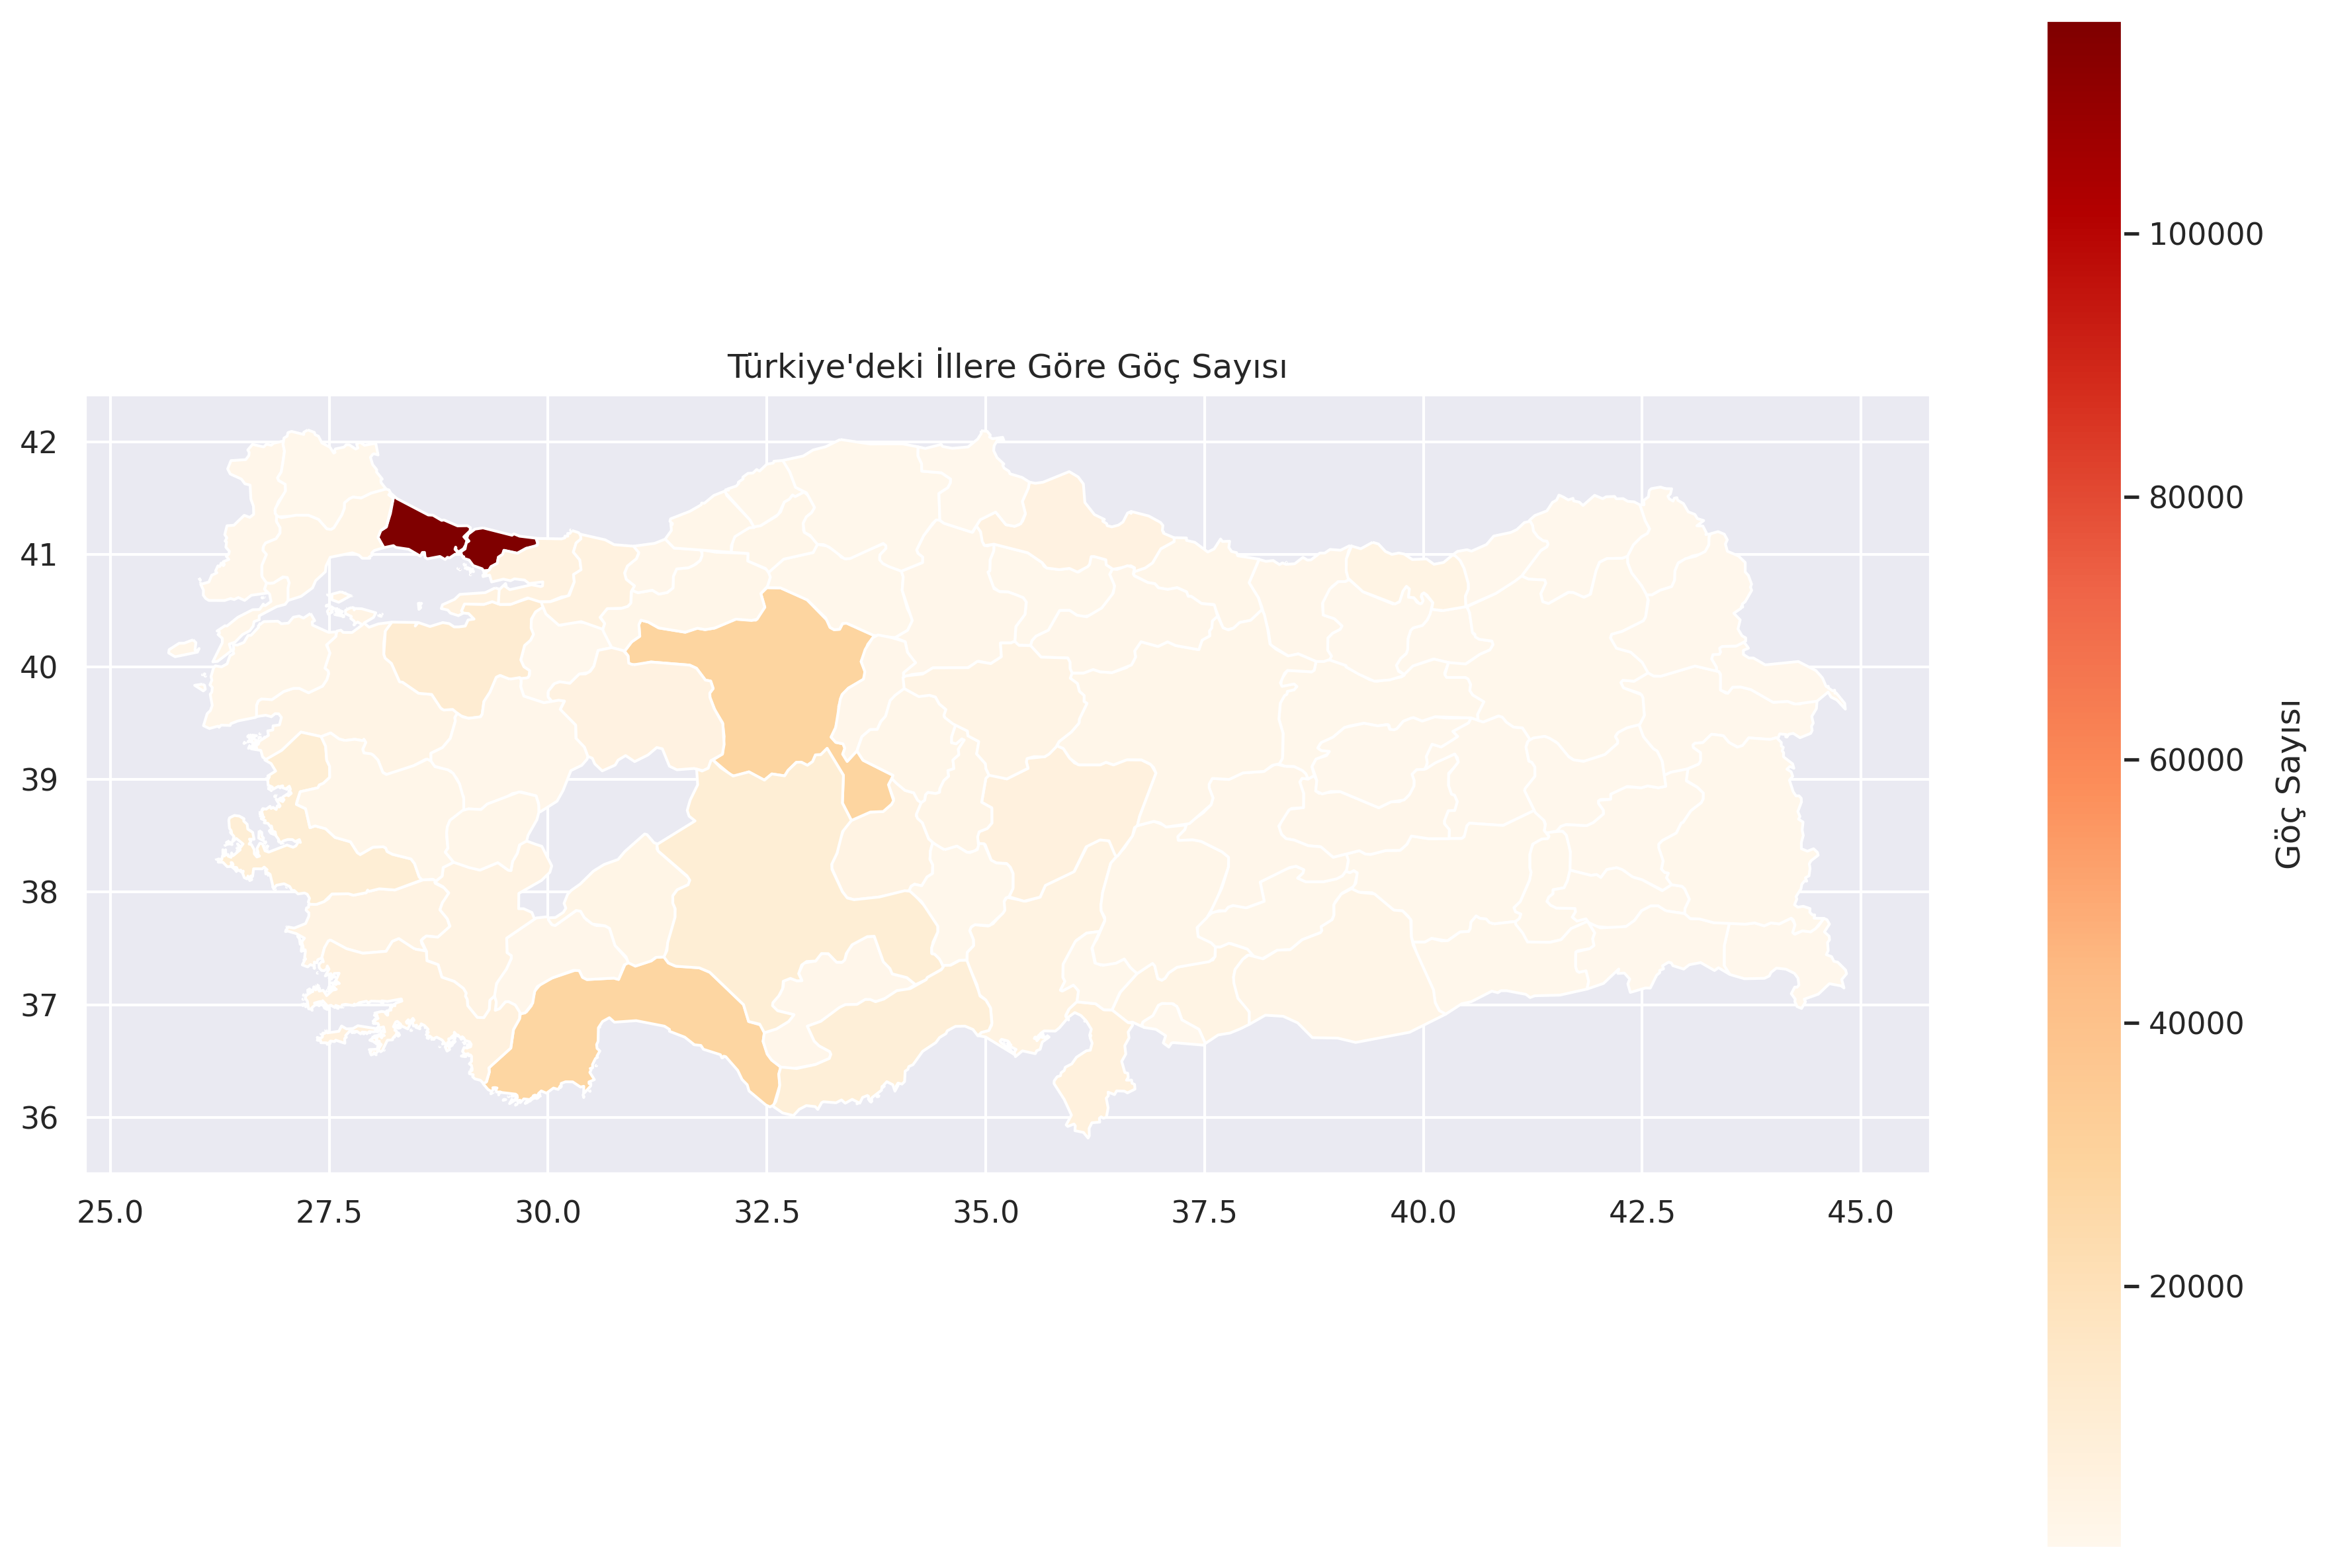

In [71]:
tr_harita = gpd.read_file("/content/tr-cities-utf8.json")

il_goc_verisi = ilGöc20[["İL", "GÖÇ"]]

tr_harita_with_goc = tr_harita.merge(il_goc_verisi, how='left', left_on='name', right_on='İL')

fig, ax = plt.subplots(figsize=(15, 10))
tr_harita_with_goc.plot(ax=ax, column='GÖÇ', cmap='OrRd', legend=True, legend_kwds={'label': "Göç Sayısı"})
plt.title("Türkiye'deki İllere Göre Göç Sayısı")
plt.show()

In [72]:
print(tr_harita.columns)

Index(['name', 'geometry'], dtype='object')


In [73]:
tr_harita.info

<bound method DataFrame.info of          name                                           geometry
0       Adana  MULTIPOLYGON (((35.27903 36.64069, 35.28181 36...
1    Adıyaman  POLYGON ((38.65534 38.09172, 38.85888 38.09243...
2       Afyon  POLYGON ((31.36277 39.16468, 31.38636 39.11867...
3        Ağrı  POLYGON ((43.39566 39.92580, 43.39423 39.79461...
4     Aksaray  POLYGON ((34.20521 38.84115, 34.26257 38.79367...
..        ...                                                ...
76       Uşak  POLYGON ((29.89273 38.77788, 29.89437 38.70968...
77        Van  POLYGON ((43.34184 39.39789, 43.42658 39.38889...
78     Yalova  POLYGON ((29.39486 40.70208, 29.44263 40.69208...
79     Yozgat  POLYGON ((35.34320 40.21666, 35.38195 40.19128...
80  Zonguldak  POLYGON ((32.02098 41.56292, 32.04119 41.52348...

[81 rows x 2 columns]>

PM10 ( µg/m3 ): Partiküler Madde 10 Mikrometre veya daha küçük (PM10) partikül madde konsantrasyonu. Havanın içinde bulunan solunabilir partikül maddenin bir ölçüsüdür.

PM 2.5 ( µg/m3 ): Partiküler Madde 2.5 Mikrometre veya daha küçük (PM2.5) partikül madde konsantrasyonu. PM10'dan daha küçük partikül madde miktarını ölçer ve solunabilir ince partikül maddenin bir göstergesidir.

SO2 ( µg/m3 ): Kükürt Dioksit (SO2) konsantrasyonu. Hava kalitesini değerlendirmek için önemli bir hava kirletici olan kükürt dioksitin bir ölçüsüdür.

CO ( µg/m3 ): Karbon Monoksit (CO) konsantrasyonu. Karbon monoksit, fosil yakıt yanması gibi kaynaklardan kaynaklanan bir hava kirleticisidir.

NO2 ( µg/m3 ): Nitrojen Dioksit (NO2) konsantrasyonu. Motorlu taşıtlardan ve endüstriyel faaliyetlerden kaynaklanan bir hava kirletici olan nitrojen dioksitin bir ölçüsüdür.

NOX ( µg/m3 ): Azot Oksit (NOx) konsantrasyonu. NO2 dahil olmak üzere tüm azot oksitleri ölçen bir parametredir.

NO ( µg/m3 ): Nitrik Oksit (NO) konsantrasyonu. Havanın içinde bulunan bir azot oksit türünü ölçer. NOx'in bir bileşeni olarak nitrik oksit, özellikle yanma süreçlerinden kaynaklanır.

In [74]:
ilvakaS1ni20 = pd.read_excel("/content/il il vaka sayısı 1 nisan 2020'e kadar.xlsx")

In [75]:
ilvakaS1ni20

,İL,TOPLAMVAKASAYISI1N20,PM10 ( µg/m3 ),PM 2.5 ( µg/m3 ),SO2 ( µg/m3 ),CO ( µg/m3 ),NO2 ( µg/m3 ),NOX ( µg/m3 ),NO ( µg/m3 ),O3 ( µg/m3 )
0,Adana,197,14.802273,0.000000,3.200909,0.000000,5.969545,9.836364,3.865909,25.476364
1,Adıyaman,9,23.862727,0.000000,4.891364,0.000000,0.000000,0.000000,0.000000,0.000000
2,Afyon,65,28.714091,0.000000,5.035000,0.000000,0.000000,0.000000,53.289091,53.289091
3,Ağrı,29,12.116818,0.000000,1.494545,404.050000,9.505909,13.833182,3.086818,53.567273
4,Aksaray,17,0.000000,19.308636,13.970000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...
76,Uşak,35,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
77,Van,6,35.415909,0.000000,23.392273,0.000000,0.000000,0.000000,0.000000,0.000000
78,Yalova,38,34.943182,14.973636,4.705909,0.000000,35.633636,47.469545,7.734545,13.243636
79,Yozgat,16,43.607273,11.201818,12.663182,400.712273,25.019545,33.588636,8.568636,0.000000


In [76]:
ilvakaS1ni20_sirali = ilvakaS1ni20.sort_values(by='TOPLAMVAKASAYISI1N20', ascending=False)

ilk_15_il = ilvakaS1ni20_sirali.head(15)

print(ilk_15_il[['İL', 'TOPLAMVAKASAYISI1N20']])

            İL  TOPLAMVAKASAYISI1N20
32  Gaziantep                    885
29   Erzincan                    853
10      Aydın                    712
80  Zonguldak                    604
61      Niğde                    584
46    Kayseri                    569
64       Rize                    410
27     Edirne                    268
74    Trabzon                    207
0       Adana                    197
50   Kırşehir                    180
47      Kilis                    135
30    Erzurum                    112
65    Sakarya                    112
75    Tunceli                    109


In [77]:
ilvakaS1ni20_sirali = ilvakaS1ni20.sort_values(by='TOPLAMVAKASAYISI1N20', ascending=True)

ilk_15_il = ilvakaS1ni20_sirali.head(15)

print(ilk_15_il[['İL', 'TOPLAMVAKASAYISI1N20']])

             İL  TOPLAMVAKASAYISI1N20
20       Bursa                      2
49  Kırklareli                      2
18        Bolu                      3
44        Kars                      3
55      Manisa                      4
6        Ankara                     4
19      Burdur                      5
36       Hatay                      5
45   Kastamonu                      6
77         Van                      6
31   Eskişehir                      7
68        Siirt                     7
28      Elazığ                      8
39    İstanbul                      8
67   Şanlıurfa                      9


In [78]:
ilvakaS1ni20_sirali = ilvakaS1ni20.sort_values(by='CO ( µg/m3 )', ascending=False)

ilk_10_il = ilvakaS1ni20_sirali.head(10)

print(ilk_10_il[['İL', 'CO ( µg/m3 )']])

            İL  CO ( µg/m3 )
80  Zonguldak     776.517619
42    Karabük     707.074091
46    Kayseri     556.131364
52      Konya     554.040455
60   Nevşehir     540.730000
38    Isparta     516.783182
18       Bolu     497.943182
39   İstanbul     490.701111
44       Kars     452.700455
50   Kırşehir     438.734286


In [79]:
ilvakaS1ni20_sirali = ilvakaS1ni20.sort_values(by='PM10 ( µg/m3 )', ascending=False)

ilk_10_il = ilvakaS1ni20_sirali.head(10)

print(ilk_10_il[['İL', 'PM10 ( µg/m3 )']])

             İL  PM10 ( µg/m3 )
47       Kilis        78.806667
80   Zonguldak        73.364762
39    İstanbul        63.975714
49  Kırklareli        60.278889
33     Giresun        59.751364
59         Muş        59.151818
12      Bartın        57.322273
54     Malatya        55.115455
27      Edirne        54.630455
45   Kastamonu        53.522500


In [80]:
ilvakaS1ni20_sirali = ilvakaS1ni20.sort_values(by='PM 2.5 ( µg/m3 )', ascending=False)

ilk_10_il = ilvakaS1ni20_sirali.head(10)

print(ilk_10_il[['İL', 'PM 2.5 ( µg/m3 )']])

            İL  PM 2.5 ( µg/m3 )
80  Zonguldak          36.793810
52      Konya          30.957333
20      Bursa          28.278600
45  Kastamonu          25.034500
12     Bartın          24.525909
11  Balıkesir          23.103182
42    Karabük          23.030909
31  Eskişehir          21.200000
19     Burdur          20.676364
39   İstanbul          20.671500


In [81]:
ilvakaS1ni20_sirali = ilvakaS1ni20.sort_values(by='SO2 ( µg/m3 )', ascending=False)

ilk_10_il = ilvakaS1ni20_sirali.head(10)

print(ilk_10_il[['İL']])

            İL
74    Trabzon 
71      Sivas 
35     Hakkari
17     Bitlis 
70     Şırnak 
11  Balıkesir 
62       Ordu 
75    Tunceli 
67  Şanlıurfa 
64       Rize 


In [82]:
ilvakaS1ni20.columns

Index(['İL', 'TOPLAMVAKASAYISI1N20', 'PM10 ( µg/m3 )', 'PM 2.5 ( µg/m3 )',
       'SO2 ( µg/m3 )', 'CO ( µg/m3 )', 'NO2 ( µg/m3 )', 'NOX ( µg/m3 )',
       'NO ( µg/m3 )', 'O3 ( µg/m3 )'],
      dtype='object')

In [83]:
ilvakaS1ni20_sirali = ilvakaS1ni20.sort_values(by='O3 ( µg/m3 )', ascending=False)

ilk_10_il = ilvakaS1ni20_sirali.head(10)

print(ilk_10_il[['İL']])

             İL
30     Erzurum 
14     Bayburt 
37       Iğdır 
38     Isparta 
8      Ardahan 
15     Bilecik 
19      Burdur 
49  Kırklareli 
3         Ağrı 
2         Afyon


In [84]:
ilvakaS1ni20_sirali = ilvakaS1ni20.sort_values(by='NOX ( µg/m3 )', ascending=False)

ilk_10_il = ilvakaS1ni20_sirali.head(10)

print(ilk_10_il[['İL']])

            İL
72   Tekirdağ 
39   İstanbul 
65    Sakarya 
53    Kütahya 
51    Kocaeli 
22    Çankırı 
78      Yalova
11  Balıkesir 
27     Edirne 
30    Erzurum 


In [85]:
ilvakaS1ni20_sirali = ilvakaS1ni20.sort_values(by='NOX ( µg/m3 )', ascending=False)

ilk_10_il = ilvakaS1ni20_sirali.head(10)

print(ilk_10_il[['İL']])

            İL
72   Tekirdağ 
39   İstanbul 
65    Sakarya 
53    Kütahya 
51    Kocaeli 
22    Çankırı 
78      Yalova
11  Balıkesir 
27     Edirne 
30    Erzurum 


In [102]:
tr_harita = gpd.read_file("/content/tr-cities-utf8.json")

<ipython-input-87-2792db35d4f8>:8: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  for x, y, label in zip(merged_data.geometry.centroid.x, merged_data.geometry.centroid.y, merged_data['İL']):


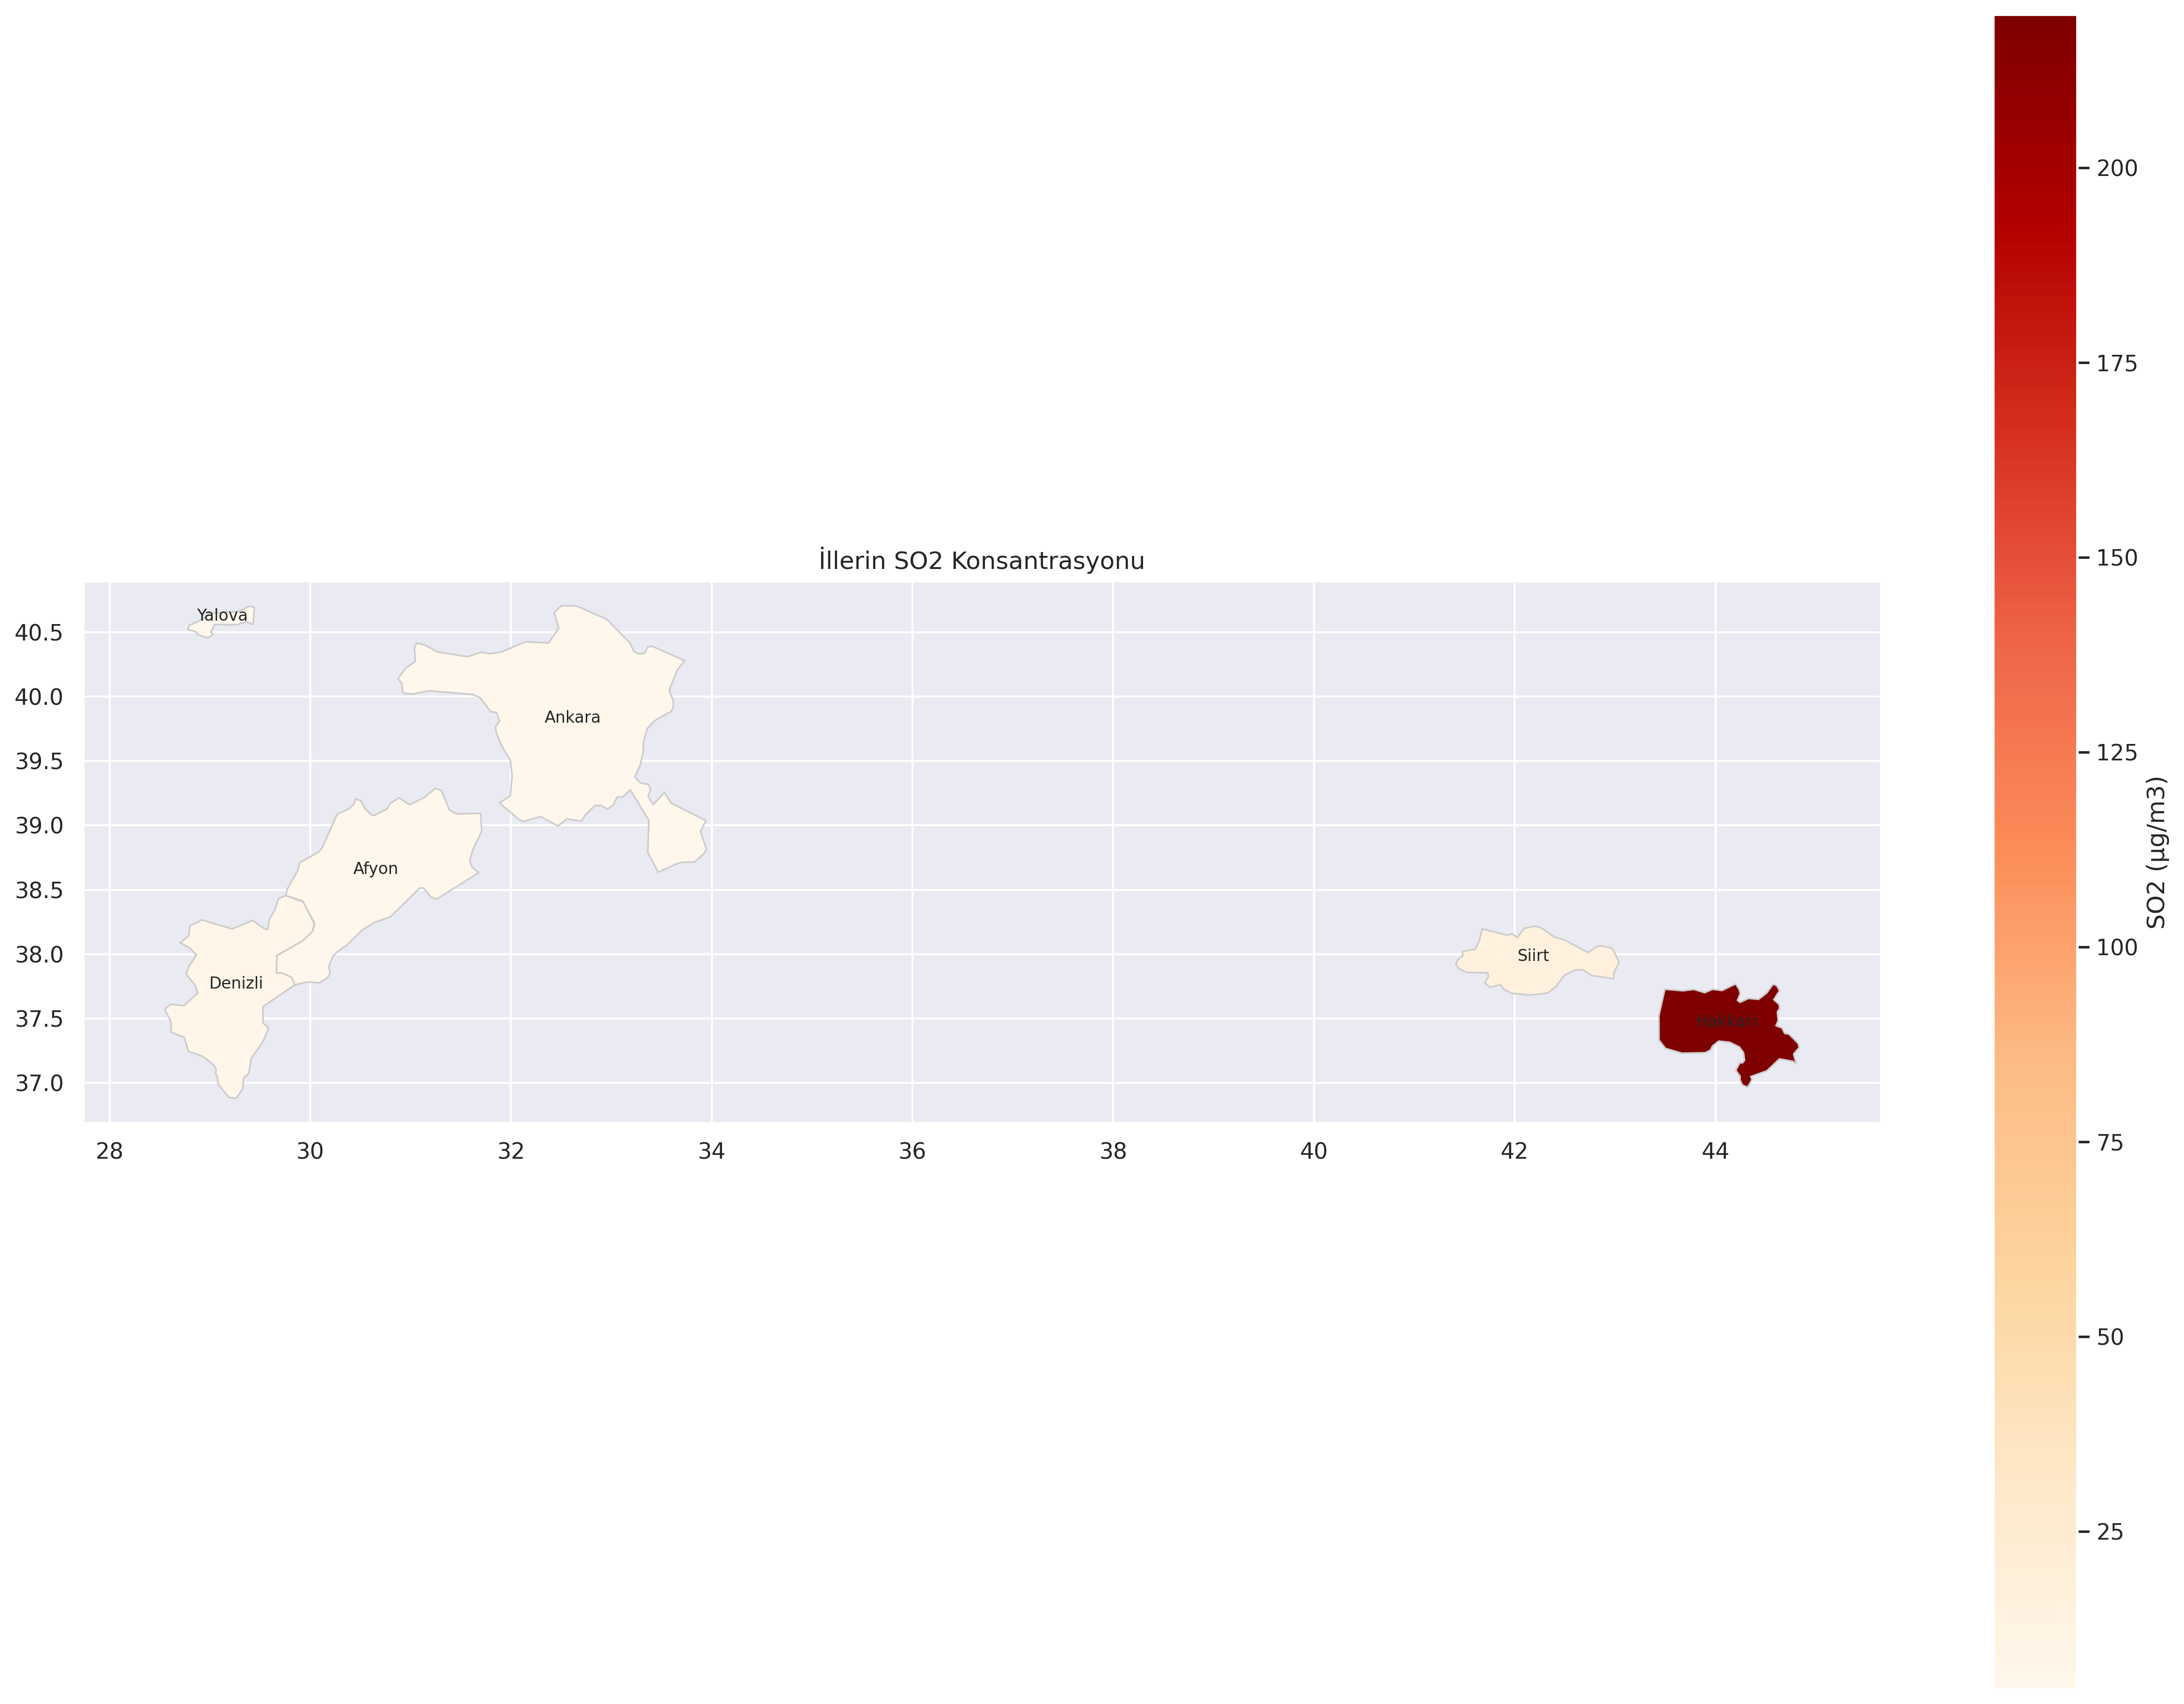

In [87]:
merged_data = tr_harita.merge(ilvakaS1ni20, left_on='name', right_on='İL', how='inner')

fig, ax = plt.subplots(figsize=(20, 15))

merged_data.plot(column='SO2 ( µg/m3 )', cmap='OrRd', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True,
                  legend_kwds={'label': "SO2 (µg/m3)"})

for x, y, label in zip(merged_data.geometry.centroid.x, merged_data.geometry.centroid.y, merged_data['İL']):
    ax.text(x, y, label, fontsize=8, ha='center')

plt.title("İllerin SO2 Konsantrasyonu")
plt.show()


In [103]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [104]:
tr_harita.columns

Index(['name', 'geometry'], dtype='object')

In [105]:
ilvakaS1ni20.columns

Index(['İL', 'TOPLAMVAKASAYISI1N20', 'PM10 ( µg/m3 )', 'PM 2.5 ( µg/m3 )',
       'SO2 ( µg/m3 )', 'CO ( µg/m3 )', 'NO2 ( µg/m3 )', 'NOX ( µg/m3 )',
       'NO ( µg/m3 )', 'O3 ( µg/m3 )'],
      dtype='object')

In [106]:
ilvakaS1ni20_CO=ilvakaS1ni20[["İL","CO ( µg/m3 )"]]

In [107]:
ilvakaS1ni20 = pd.read_excel("/content/il il vaka sayısı 1 nisan 2020'e kadar.xlsx")

<ipython-input-108-affc8c504907>:12: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  for x, y, label in zip(merged_data.geometry.centroid.x, merged_data.geometry.centroid.y, merged_data['İL']):


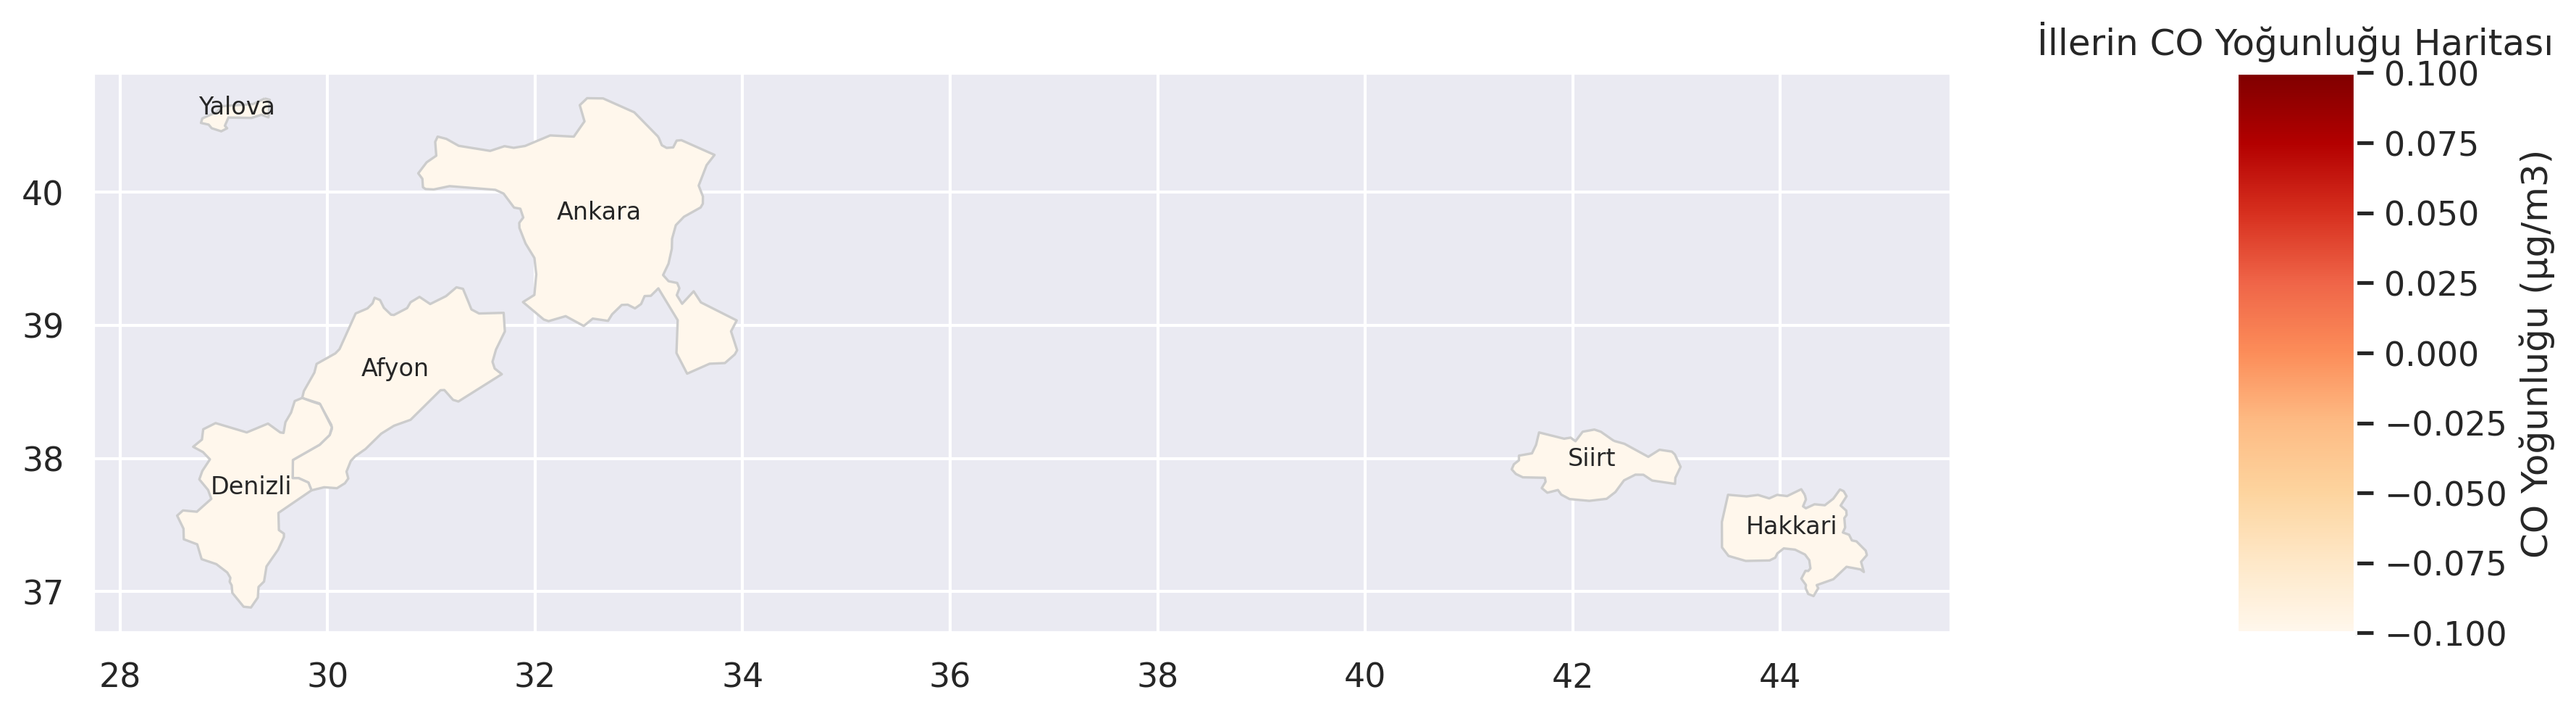

In [108]:
merged_data = tr_harita.merge(ilvakaS1ni20, left_on='name', right_on='İL', how='inner')


fig, ax = plt.subplots(1, 1, figsize=(15, 10))

divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)

merged_data.plot(column='CO ( µg/m3 )', cmap='OrRd', linewidth=0.8, ax=ax, edgecolor='0.8',
                 legend=True, cax=cax, legend_kwds={'label': "CO Yoğunluğu (µg/m3)"})

for x, y, label in zip(merged_data.geometry.centroid.x, merged_data.geometry.centroid.y, merged_data['İL']):
    ax.text(x, y, label, fontsize=8, ha='center')

plt.title("İllerin CO Yoğunluğu Haritası")
plt.show()


son iki haritadada istediğim sonuçu elde edemedim fakat verileri elde edebildim.Haritalarda istediğim görüntü CO yoğunluğunun fazla olduğu illeri koyudan açık renge renklendirmesi fakat koordinat veri setimin crs formatına dönüştüremediğimden çoğu il gözükmüyor."